# SmarTemplateAnalysisGroupedBy

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
pre = pd.read_csv('../../Dataset/newTrain.csv')
post = pd.read_csv('../../Dataset/newTrain.csv')
pre["PurchDate"] = pre["PurchDate"].astype("datetime64")
post["PurchDate"] = post["PurchDate"].astype("datetime64")

#Variabile categorica rispetto alla quela effettuare l'analisi
VarGroup='IsBadBuy'

#Set dei titoli relativi ai plot delle variabili
RealTitle=VarGroup+' by '
additional1=' pre'
additional2=' post'

#variabile che definisce la presenza di un confroto
comp=True

#numero di bins  per gli istogrammi
PreBins=math.ceil(math.log(pre.shape[0],2))+1
PostBins=math.ceil(math.log(post.shape[0],2))+1

#listaVariabiliCategoriche
categories=['IsBadBuy', 'Auction', 'Make', 'Engine', 'Trim', 'SubModelSpecifics', 'Color', 'Transmission', 
            'WheelTypeID', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART',
            'BYRNO', 'VNZIP1', 'VNST', 'IsOnlineSale', 'Model', 'Wheeldrives', 'Doors', 'SubModel']

#listaVariabiliNumeriche (per statistiche)
num_catProp=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 
         'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
         'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
         'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','VehBCost','WarrantyCost','VehOdo']

##listaVariabiliNumeriche (per statistiche con limite superiore e inferiore) (Non implementati i limiti!)
num_catDis=[['VehOdo', 20000,0], ['MMRAcquisitionAuctionAveragePrice',20000,0], ['MMRAcquisitionAuctionCleanPrice',20000,0], 
         ['MMRAcquisitionRetailAveragePrice',20000,0],['MMRAcquisitonRetailCleanPrice',20000,0],
         ['MMRCurrentAuctionAveragePrice',20000,0],['MMRCurrentAuctionCleanPrice',20000,0],
         ['MMRCurrentRetailAveragePrice',20000,0],['MMRCurrentRetailCleanPrice',20000,0],['VehBCost',20000,0],['WarrantyCost',20000,0]]

In [3]:
pre.isnull().sum() 

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Engine                               19582
Trim                                  1793
SubModelSpecifics                    49091
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

In [4]:
post.isnull().sum() 

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Engine                               19582
Trim                                  1793
SubModelSpecifics                    49091
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

In [5]:
(pre == 0).sum(axis=0)

RefId                                    0
IsBadBuy                             51178
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               1
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                              4
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice      648
MMRAcquisitionAuctionCleanPrice        552
MMRAcquisitionRetailAveragePrice       648
MMRAcquisitonRetailCleanPrice          648
MMRCurrentAuctionAveragePrice          393
MMRCurrentA

In [6]:
(post == 0).sum(axis=0)

RefId                                    0
IsBadBuy                             51178
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               1
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                              4
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice      648
MMRAcquisitionAuctionCleanPrice        552
MMRAcquisitionRetailAveragePrice       648
MMRAcquisitonRetailCleanPrice          648
MMRCurrentAuctionAveragePrice          393
MMRCurrentA

In [7]:
(pre == 1).sum(axis=0)

RefId                                    1
IsBadBuy                              7208
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                            2509
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                          28735
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice         96
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [8]:
(post == 1).sum(axis=0)

RefId                                    1
IsBadBuy                              7208
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                            2509
Make                                     0
Engine                                   0
Trim                                     0
SubModelSpecifics                        0
Color                                    0
Transmission                             0
WheelTypeID                          28735
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice         96
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

# Analisi Variabili Particolari

# PurchDate

In [9]:
Variable='PurchDate'

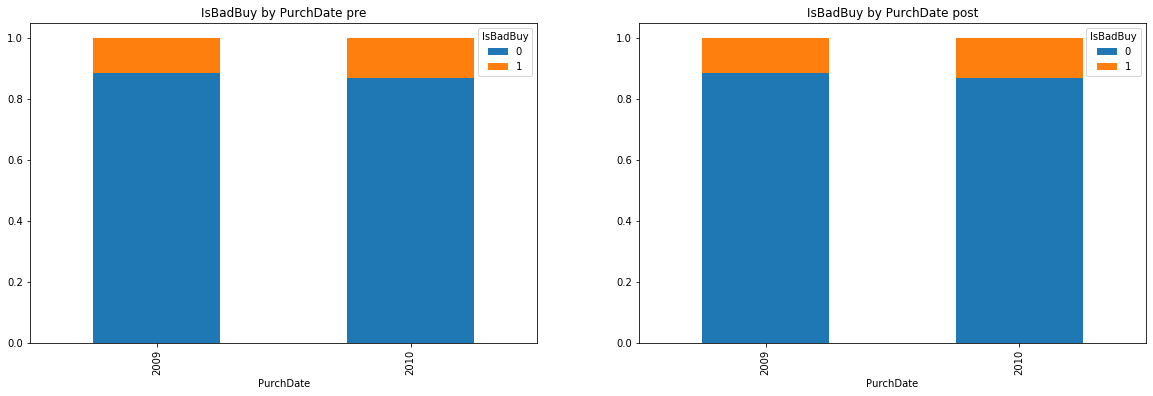

In [10]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    title1=RealTitle+Variable

    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    #Creation of the cross tab
    pclass_xt1 = pd.crosstab(pre[Variable].dt.year, pre[VarGroup])
    pclass_xt1

    #Normalize the cross tab to sum to 1:
    pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
    pclass_xt_pct1

    # Plot old Distribution
    ax1 = plt.subplot2grid(fig_dims, (0, 0))
    pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=title1+additional1, ax=ax1)

    if compare:
        #Creation of the cross tab
        pclass_xt2 = pd.crosstab(post[Variable].dt.year, post[VarGroup])
        pclass_xt2

        # Normalize the cross tab to sum to 1:
        pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
        pclass_xt_pct2

        # Plot new Distribution
        ax2 = plt.subplot2grid(fig_dims, (0, 1))
        pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

plt.show()

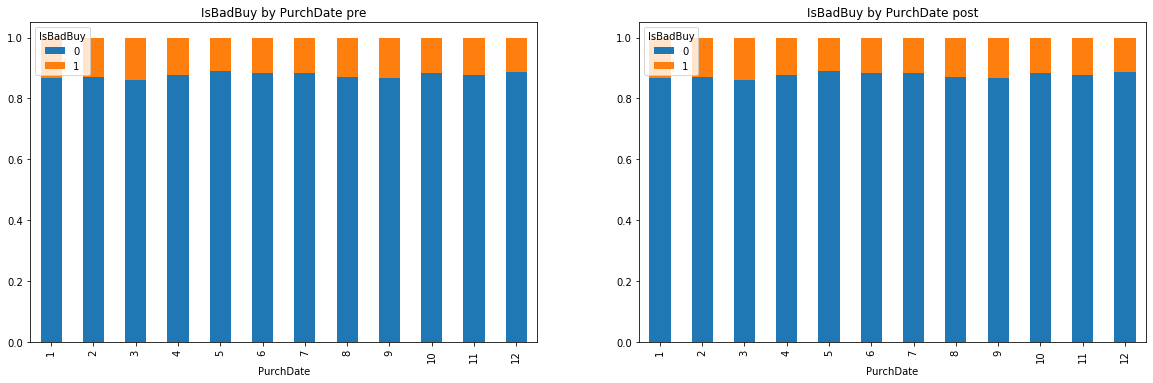

In [11]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    title1=RealTitle+Variable

    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    #Creation of the cross tab
    pclass_xt1 = pd.crosstab(pre[Variable].dt.month, pre[VarGroup])
    pclass_xt1

    #Normalize the cross tab to sum to 1:
    pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
    pclass_xt_pct1

    # Plot old Distribution
    ax1 = plt.subplot2grid(fig_dims, (0, 0))
    pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=title1+additional1, ax=ax1)

    if compare:
        #Creation of the cross tab
        pclass_xt2 = pd.crosstab(post[Variable].dt.month, post[VarGroup])
        pclass_xt2

        # Normalize the cross tab to sum to 1:
        pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
        pclass_xt_pct2

        # Plot new Distribution
        ax2 = plt.subplot2grid(fig_dims, (0, 1))
        pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

plt.show()

# VehicleYear

In [12]:
Variable='VehYear'

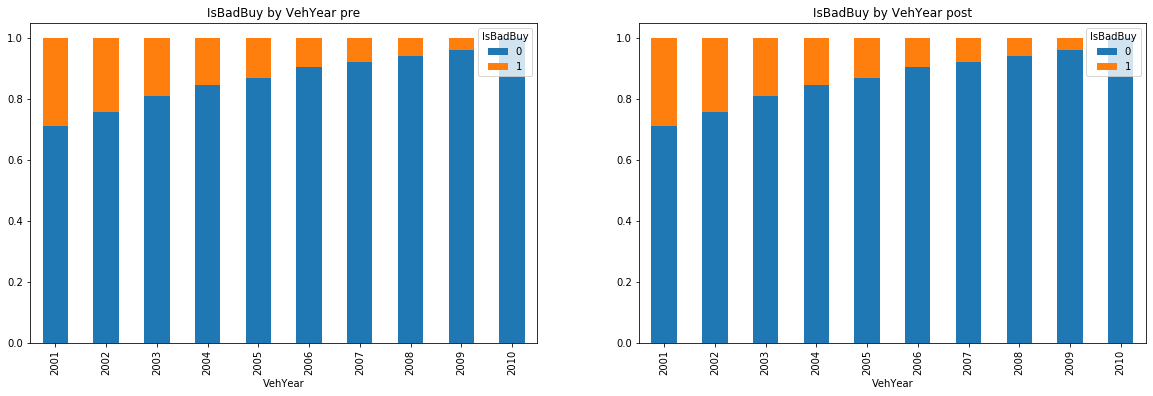

In [13]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    title1=RealTitle+Variable

    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    #Creation of the cross tab
    pclass_xt1 = pd.crosstab(pre[Variable], pre[VarGroup])
    pclass_xt1

    #Normalize the cross tab to sum to 1:
    pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
    pclass_xt_pct1

    # Plot old Distribution
    ax1 = plt.subplot2grid(fig_dims, (0, 0))
    pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=title1+additional1, ax=ax1)

    if compare:
        #Creation of the cross tab
        pclass_xt2 = pd.crosstab(post[Variable], post[VarGroup])
        pclass_xt2

        # Normalize the cross tab to sum to 1:
        pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
        pclass_xt_pct2

        # Plot new Distribution
        ax2 = plt.subplot2grid(fig_dims, (0, 1))
        pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

plt.show()

In [14]:
if Variable in pre.columns:
    print(pre[Variable].value_counts())

2006    13668
2005    12367
2007     9129
2004     8126
2008     5502
2003     4990
2002     2731
2001     1188
2009      684
2010        1
Name: VehYear, dtype: int64


In [15]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    if compare:
        print(post[Variable].value_counts())

2006    13668
2005    12367
2007     9129
2004     8126
2008     5502
2003     4990
2002     2731
2001     1188
2009      684
2010        1
Name: VehYear, dtype: int64


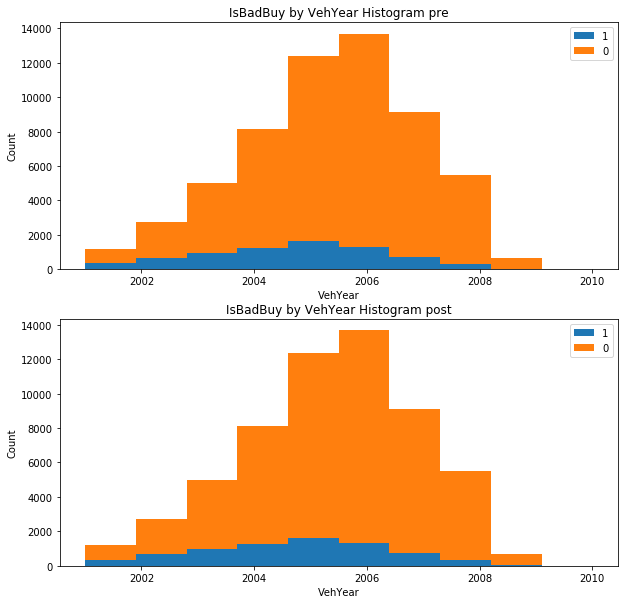

In [16]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    # Set up a grid of plots
    fig, axes = plt.subplots(2, 1, figsize=(10,10))

    title=RealTitle+Variable+str(' Histogram')
    listUnique=list(pre[VarGroup].unique())
    listToPlot=[]

    for value in listUnique:
        tmp = pre[pre[VarGroup] == value][Variable]
        listToPlot.append(tmp)

    max1 = pre[Variable].max()
    min1 = pre[Variable].min()
    bins1 = int(max1 / 10)
    
    if pre[Variable].nunique() <20:
        bins1=pre[Variable].nunique()
        

    axes[0].hist(listToPlot, 
                 bins=bins1, # bin_size
                 range=(min1, max1), 
                 stacked=True)


    axes[0].legend(tuple(listUnique), loc='best')
    axes[0].set_title(title+additional1)
    axes[0].set_xlabel(Variable)
    axes[0].set_ylabel('Count')

    if compare:
        listUnique=list(post[VarGroup].unique())
        listToPlot=[]

        for value in listUnique:
            tmp = post[pre[VarGroup] == value][Variable]
            listToPlot.append(tmp)

        max1 = post[Variable].max()
        min1 = post[Variable].min()
        bins1 = int(max1 / 10)
    
        if pre[Variable].nunique() <20:
            bins1=pre[Variable].nunique()

        axes[1].hist(listToPlot, 
                     bins=bins1, # bin_size
                     range=(min1, max1), 
                     stacked=True)


        axes[1].legend(tuple(listUnique), loc='best')
        axes[1].set_title(title+additional2)
        axes[1].set_xlabel(Variable)
        axes[1].set_ylabel('Count')
        
    plt.show()
    

# VehicleAge

In [17]:
Variable='VehicleAge'

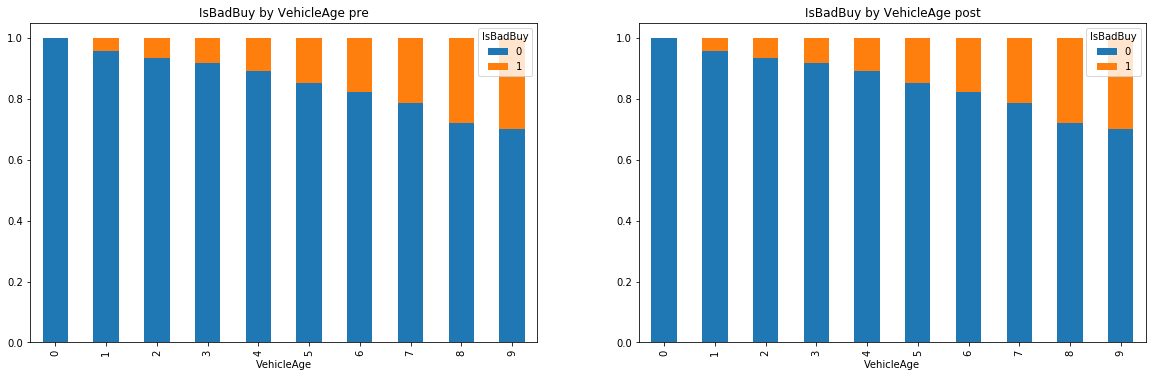

In [18]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    title1=RealTitle+Variable

    # Set up a grid of plots
    fig = plt.figure(figsize=(20, 20)) 
    fig_dims = (3, 2)

    #Creation of the cross tab
    pclass_xt1 = pd.crosstab(pre[Variable], pre[VarGroup])
    pclass_xt1

    #Normalize the cross tab to sum to 1:
    pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
    pclass_xt_pct1

    # Plot old Distribution
    ax1 = plt.subplot2grid(fig_dims, (0, 0))
    pclass_xt_pct1.plot(kind='bar', stacked=True, 
                   title=title1+additional1, ax=ax1)

    if compare:
        #Creation of the cross tab
        pclass_xt2 = pd.crosstab(post[Variable], post[VarGroup])
        pclass_xt2

        # Normalize the cross tab to sum to 1:
        pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
        pclass_xt_pct2

        # Plot new Distribution
        ax2 = plt.subplot2grid(fig_dims, (0, 1))
        pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

plt.show()

In [19]:
if Variable in pre.columns:
    print(pre[Variable].value_counts())

4    13684
3    12703
5    10303
2     6770
6     6382
7     3724
1     2509
8     1800
9      510
0        1
Name: VehicleAge, dtype: int64


In [20]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    if compare:
        print(post[Variable].value_counts())

4    13684
3    12703
5    10303
2     6770
6     6382
7     3724
1     2509
8     1800
9      510
0        1
Name: VehicleAge, dtype: int64


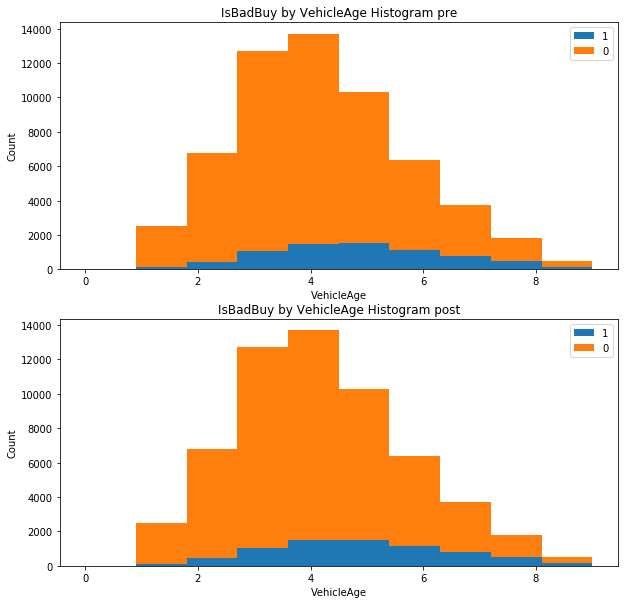

In [21]:
if Variable in pre.columns:
    compare= comp and Variable in post.columns
    # Set up a grid of plots
    fig, axes = plt.subplots(2, 1, figsize=(10,10))

    title=RealTitle+Variable+str(' Histogram')
    listUnique=list(pre[VarGroup].unique())
    listToPlot=[]

    for value in listUnique:
        tmp = pre[pre[VarGroup] == value][Variable]
        listToPlot.append(tmp)

    max1 = pre[Variable].max()
    min1 = pre[Variable].min()
    bins1 = int(max1 / 10)
    
    if pre[Variable].nunique() <20:
        bins1=pre[Variable].nunique()
        

    axes[0].hist(listToPlot, 
                 bins=bins1, # bin_size
                 range=(min1, max1), 
                 stacked=True)


    axes[0].legend(tuple(listUnique), loc='best')
    axes[0].set_title(title+additional1)
    axes[0].set_xlabel(Variable)
    axes[0].set_ylabel('Count')

    if compare:
        listUnique=list(post[VarGroup].unique())
        listToPlot=[]

        for value in listUnique:
            tmp = post[pre[VarGroup] == value][Variable]
            listToPlot.append(tmp)

        max1 = post[Variable].max()
        min1 = post[Variable].min()
        bins1 = int(max1 / 10)
    
        if pre[Variable].nunique() <20:
            bins1=pre[Variable].nunique()

        axes[1].hist(listToPlot, 
                     bins=bins1, # bin_size
                     range=(min1, max1), 
                     stacked=True)


        axes[1].legend(tuple(listUnique), loc='best')
        axes[1].set_title(title+additional2)
        axes[1].set_xlabel(Variable)
        axes[1].set_ylabel('Count')
        
    plt.show()

# Analisi Comulativa delle Variabili Simili

IsBadBuy


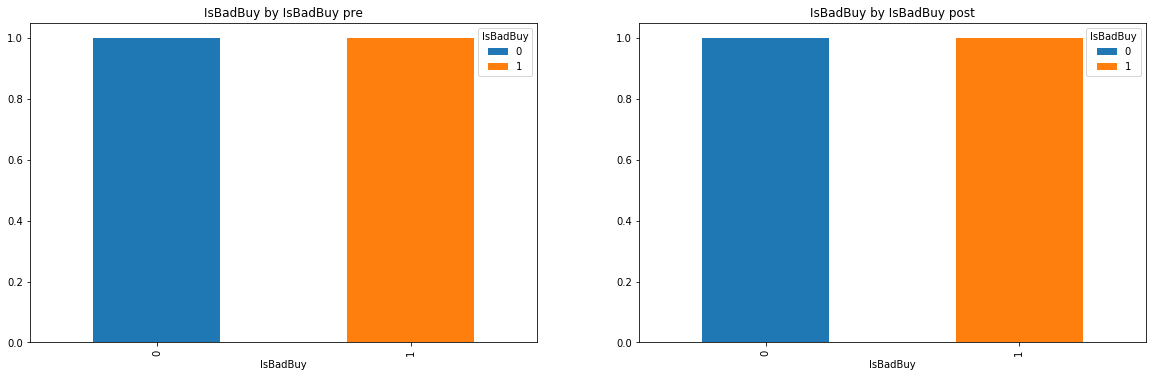

I valori nel pre con meno di 2 elementi sono:
Series([], Name: IsBadBuy, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: IsBadBuy, dtype: int64)





Auction


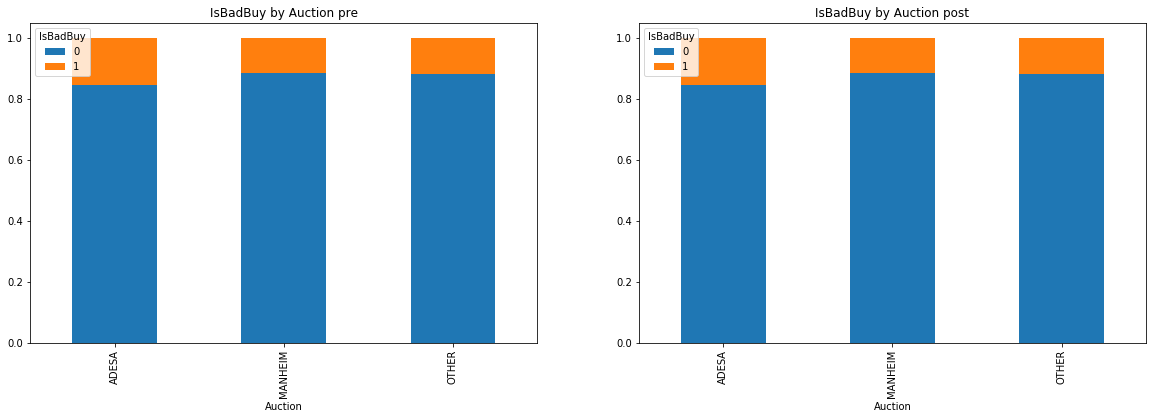

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Auction, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Auction, dtype: int64)





Make


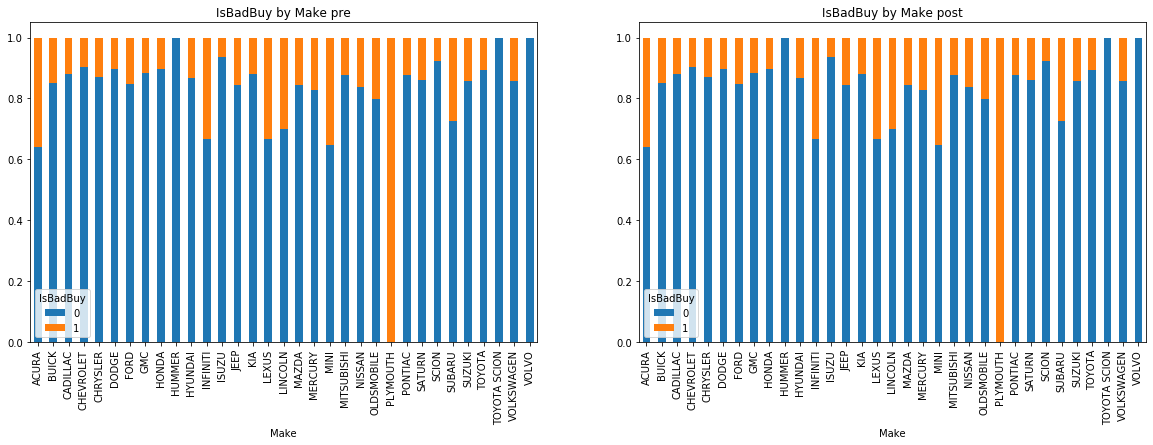

I valori nel pre con meno di 2 elementi sono:
PLYMOUTH        1
TOYOTA SCION    1
HUMMER          1
Name: Make, dtype: int64


I valori nel post con meno di 2 elementi sono:
PLYMOUTH        1
TOYOTA SCION    1
HUMMER          1
Name: Make, dtype: int64





Engine


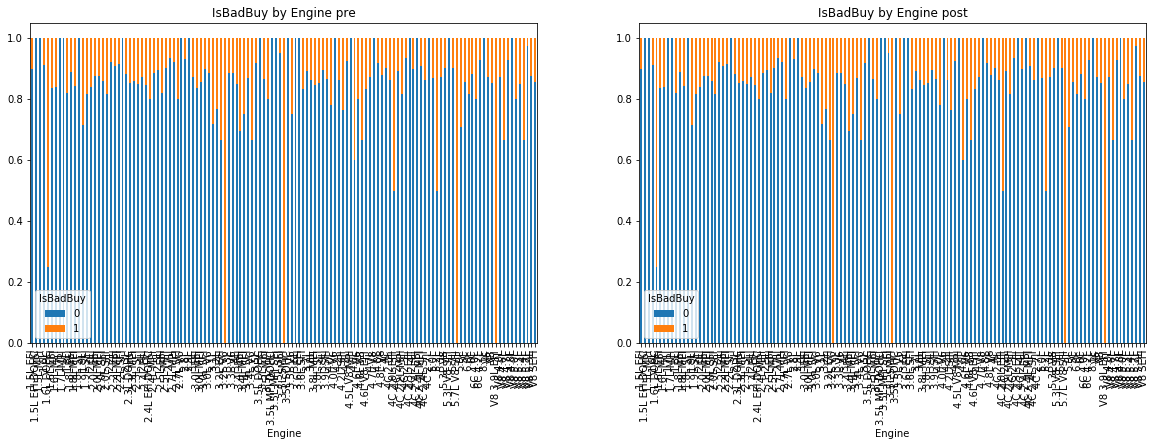

I valori nel pre con meno di 2 elementi sono:
3.2L V6         1
3.6L EFI        1
3.5L SMPI       1
1.7L            1
3.5L SOHC       1
3.5L MPI SFI    1
8.1L            1
5.3L V8 SFI     1
3.5L DOHC       1
V8 3.9L EFI     1
Name: Engine, dtype: int64


I valori nel post con meno di 2 elementi sono:
3.2L V6         1
3.6L EFI        1
3.5L SMPI       1
1.7L            1
3.5L SOHC       1
3.5L MPI SFI    1
8.1L            1
5.3L V8 SFI     1
3.5L DOHC       1
V8 3.9L EFI     1
Name: Engine, dtype: int64





Trim


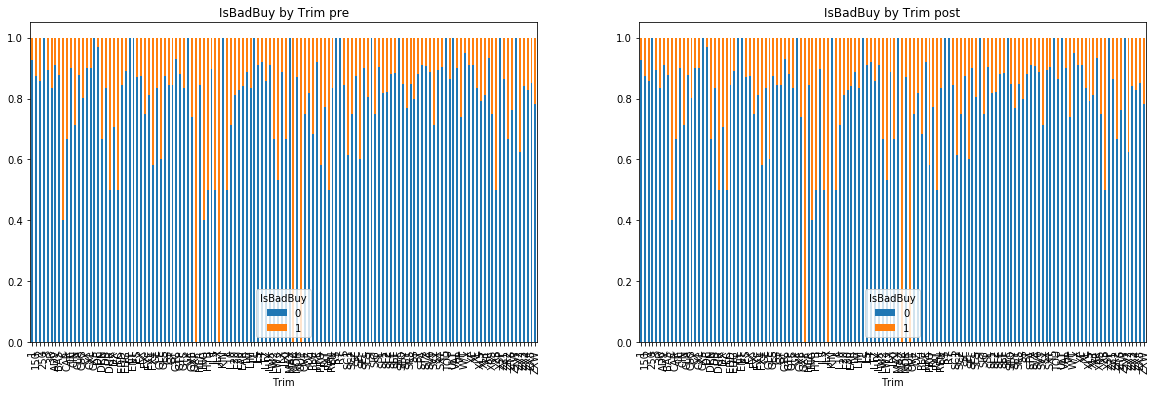

I valori nel pre con meno di 2 elementi sono:
LL     1
SI     1
JLX    1
OUT    1
ULT    1
MAZ    1
XSP    1
Name: Trim, dtype: int64


I valori nel post con meno di 2 elementi sono:
LL     1
SI     1
JLX    1
OUT    1
ULT    1
MAZ    1
XSP    1
Name: Trim, dtype: int64





SubModelSpecifics


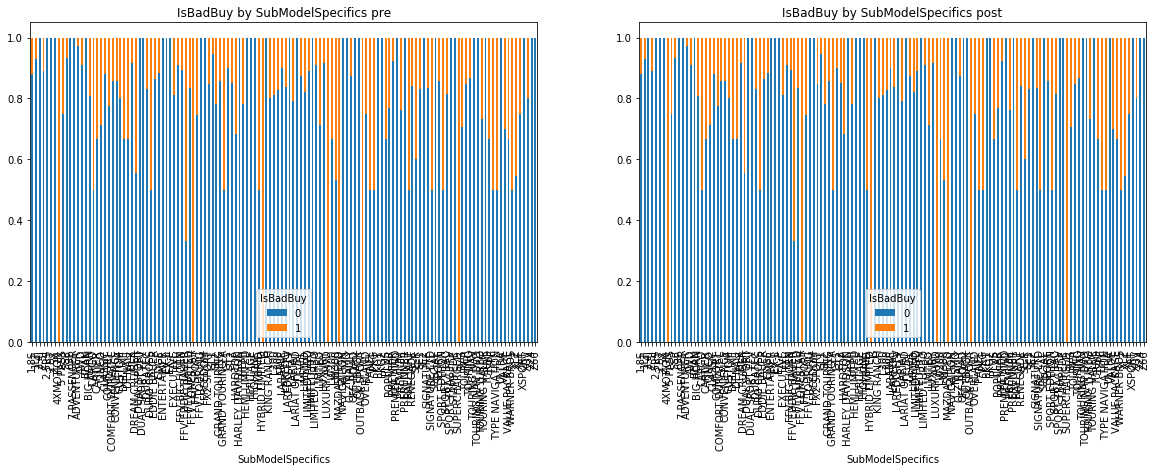

I valori nel pre con meno di 2 elementi sono:
ULTRA              1
TOURING VALUE      1
HYBRID LIMITED     1
DUAL SPORT FFV     1
OUTBACK            1
4XMOTION           1
TOURING NAV        1
SUPERCHARGED       1
2.5T               1
SPORT TRAC FFV     1
OFF-ROAD           1
MAZDASPEED         1
LUXURY AWD         1
BEAN               1
FREEDOM            1
NISMO              1
OUTBACK SPORT      1
FFV LONESTAR       1
2.5RS              1
TOURING NAV DVD    1
DUAL SPORT         1
Name: SubModelSpecifics, dtype: int64


I valori nel post con meno di 2 elementi sono:
ULTRA              1
TOURING VALUE      1
HYBRID LIMITED     1
DUAL SPORT FFV     1
OUTBACK            1
4XMOTION           1
TOURING NAV        1
SUPERCHARGED       1
2.5T               1
SPORT TRAC FFV     1
OFF-ROAD           1
MAZDASPEED         1
LUXURY AWD         1
BEAN               1
FREEDOM            1
NISMO              1
OUTBACK SPORT      1
FFV LONESTAR       1
2.5RS              1
TOURING NAV DVD    1
DUAL S

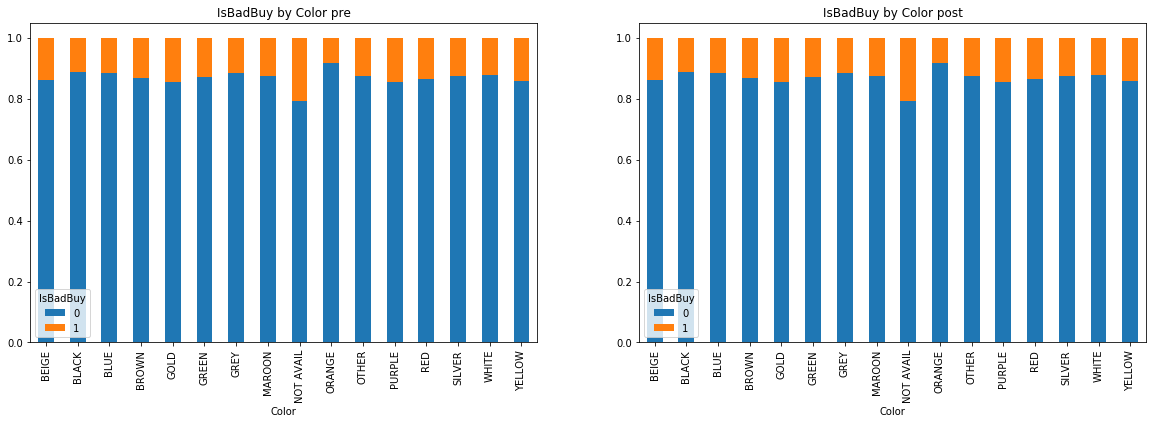

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Color, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Color, dtype: int64)





Transmission


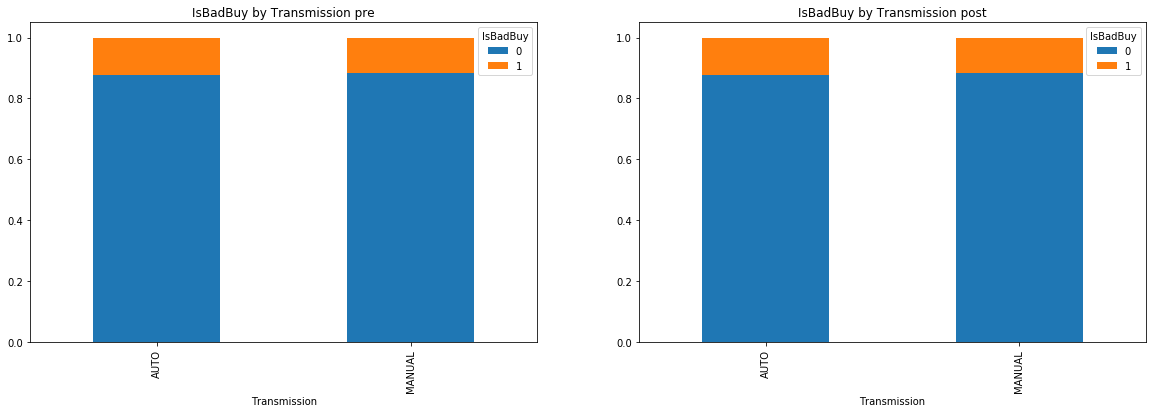

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Transmission, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Transmission, dtype: int64)





WheelTypeID


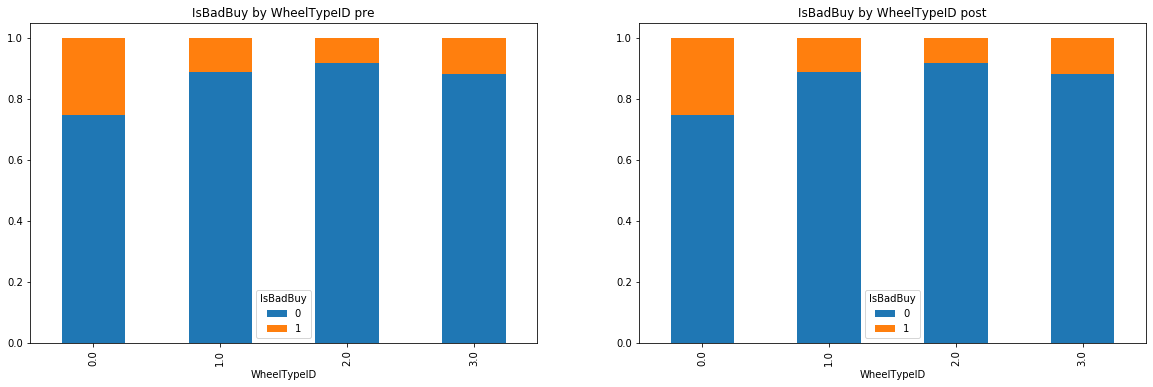

I valori nel pre con meno di 2 elementi sono:
Series([], Name: WheelTypeID, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: WheelTypeID, dtype: int64)





WheelType


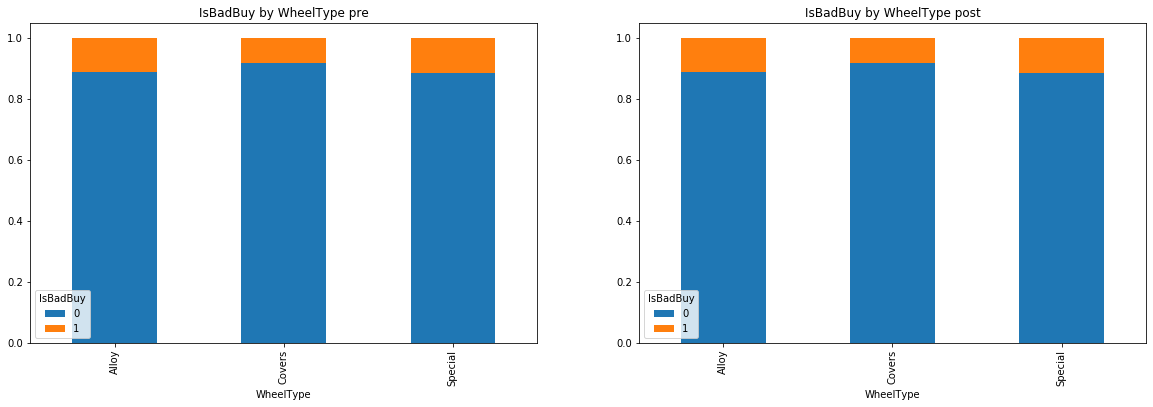

I valori nel pre con meno di 2 elementi sono:
Series([], Name: WheelType, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: WheelType, dtype: int64)





Nationality


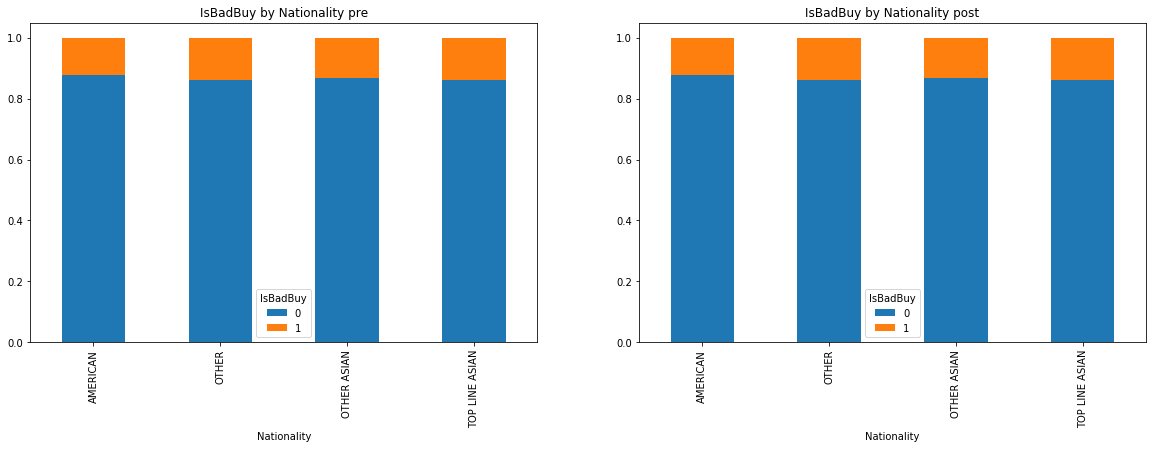

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Nationality, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Nationality, dtype: int64)





Size


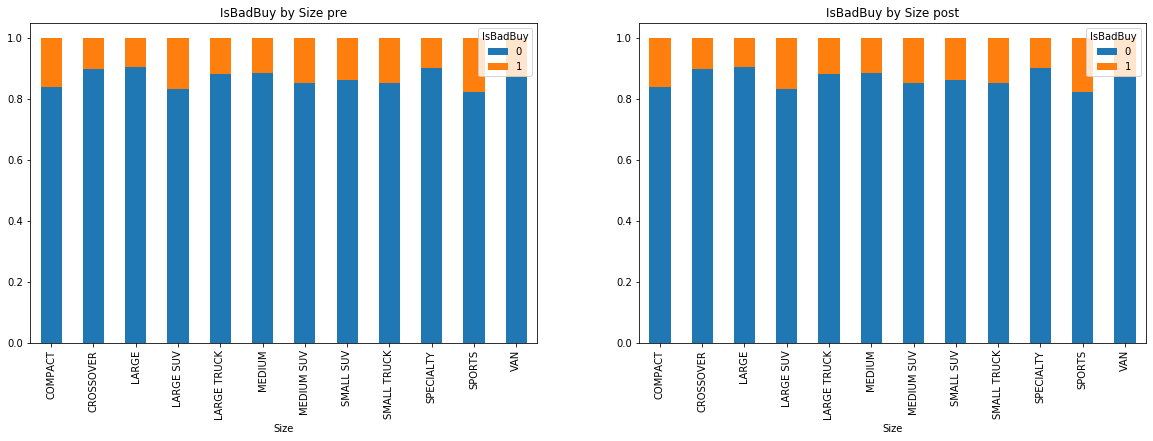

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Size, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Size, dtype: int64)





TopThreeAmericanName


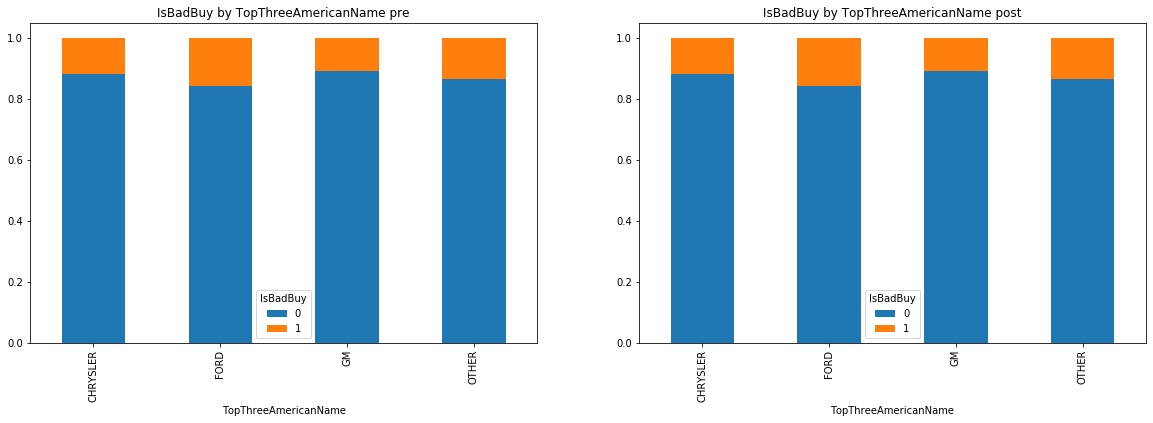

I valori nel pre con meno di 2 elementi sono:
Series([], Name: TopThreeAmericanName, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: TopThreeAmericanName, dtype: int64)





PRIMEUNIT


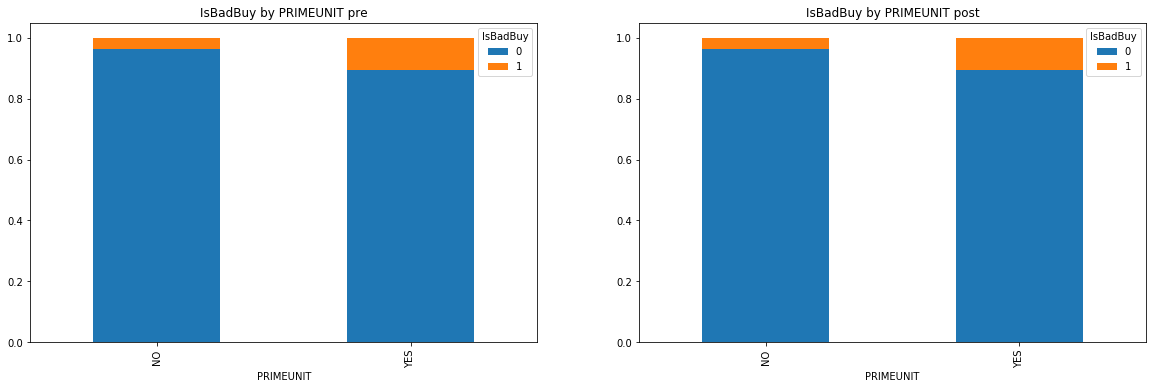

I valori nel pre con meno di 2 elementi sono:
Series([], Name: PRIMEUNIT, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: PRIMEUNIT, dtype: int64)





AUCGUART


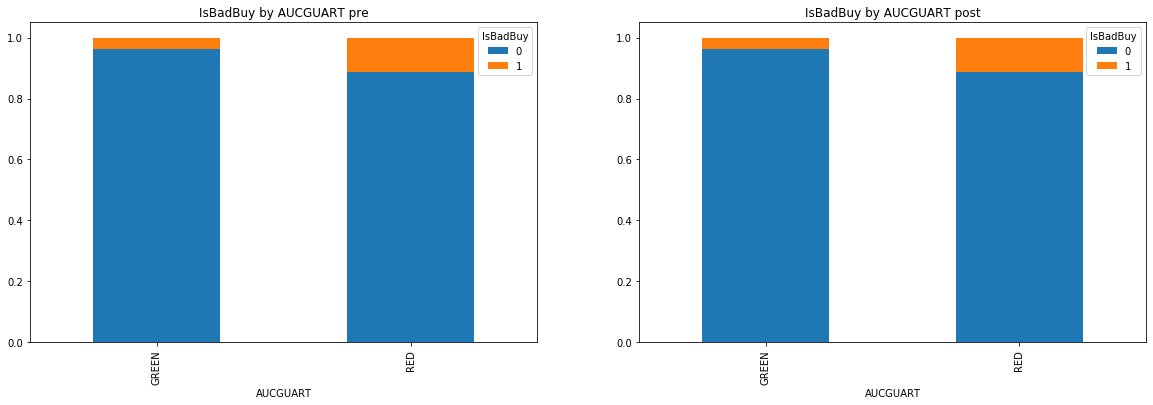

I valori nel pre con meno di 2 elementi sono:
Series([], Name: AUCGUART, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: AUCGUART, dtype: int64)





BYRNO


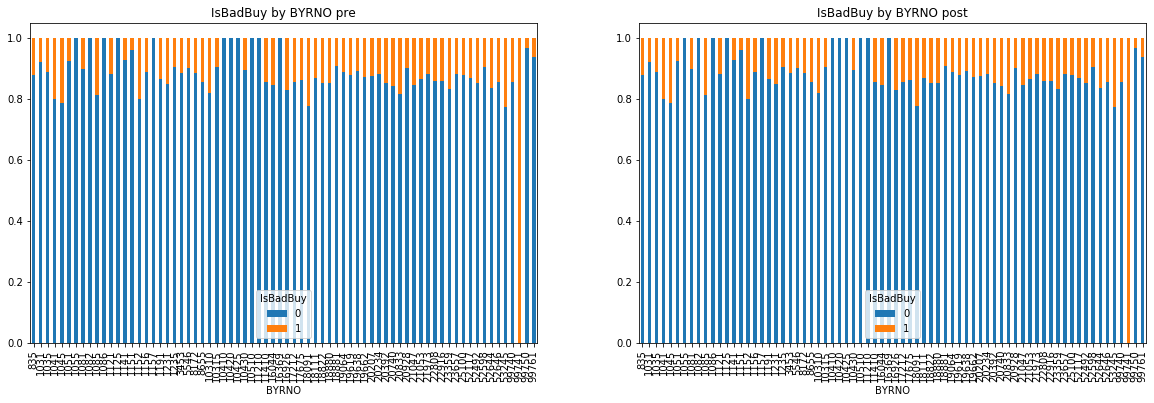

I valori nel pre con meno di 2 elementi sono:
1157     1
10425    1
99741    1
1086     1
Name: BYRNO, dtype: int64


I valori nel post con meno di 2 elementi sono:
1157     1
10425    1
99741    1
1086     1
Name: BYRNO, dtype: int64





VNZIP1


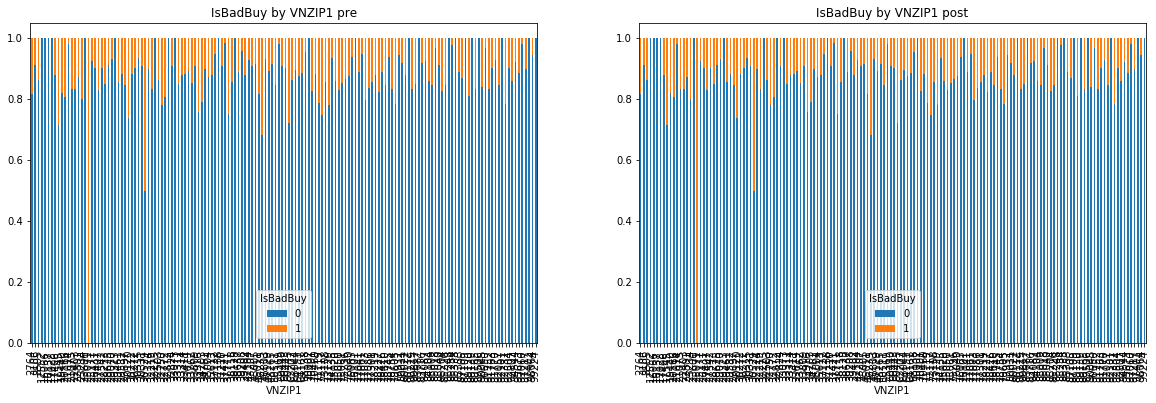

I valori nel pre con meno di 2 elementi sono:
25071    1
85248    1
85338    1
80112    1
76101    1
Name: VNZIP1, dtype: int64


I valori nel post con meno di 2 elementi sono:
25071    1
85248    1
85338    1
80112    1
76101    1
Name: VNZIP1, dtype: int64





VNST


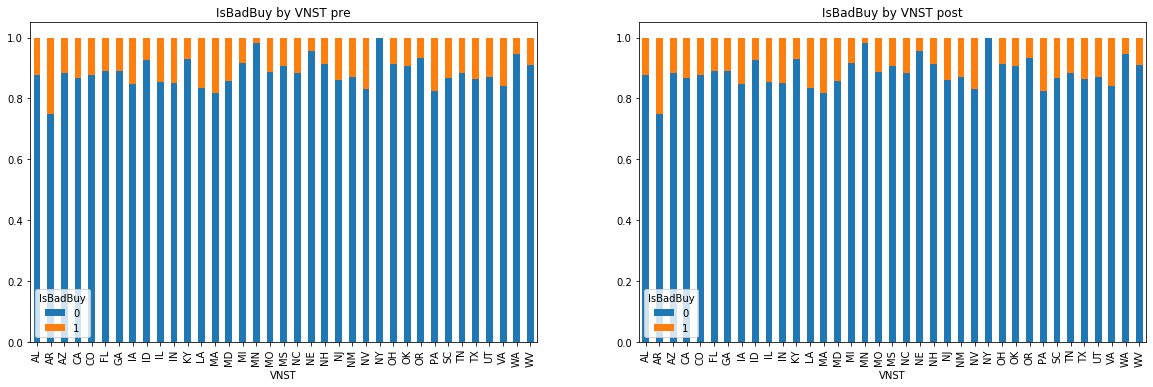

I valori nel pre con meno di 2 elementi sono:
Series([], Name: VNST, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: VNST, dtype: int64)





IsOnlineSale


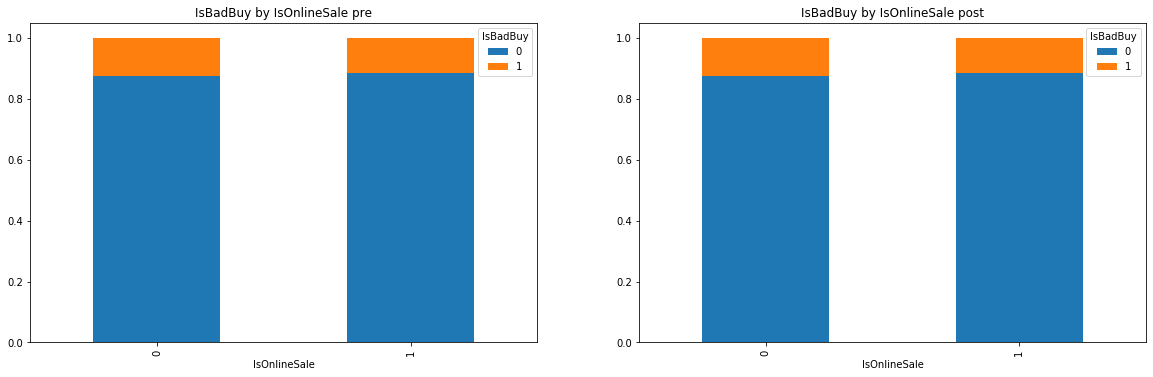

I valori nel pre con meno di 2 elementi sono:
Series([], Name: IsOnlineSale, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: IsOnlineSale, dtype: int64)





Model


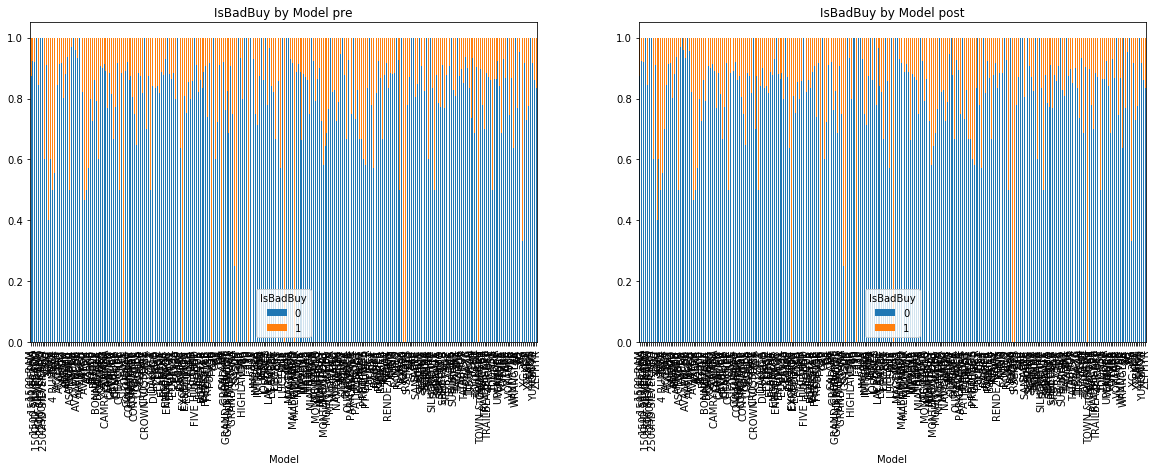

I valori nel pre con meno di 2 elementi sono:
FIT              1
H3               1
LHS              1
CL               1
I-370            1
I-290            1
RX330            1
GS450H           1
Pacifica         1
EXCURSION        1
2500HD SIERRA    1
TOUAREG          1
G8               1
MR2 SPYDER       1
FX35             1
PASSAT           1
S60              1
IS300            1
SIERRA           1
G20              1
MALIBU HYBRID    1
Name: Model, dtype: int64


I valori nel post con meno di 2 elementi sono:
FIT              1
H3               1
LHS              1
CL               1
I-370            1
I-290            1
RX330            1
GS450H           1
Pacifica         1
EXCURSION        1
2500HD SIERRA    1
TOUAREG          1
G8               1
MR2 SPYDER       1
FX35             1
PASSAT           1
S60              1
IS300            1
SIERRA           1
G20              1
MALIBU HYBRID    1
Name: Model, dtype: int64





Doors


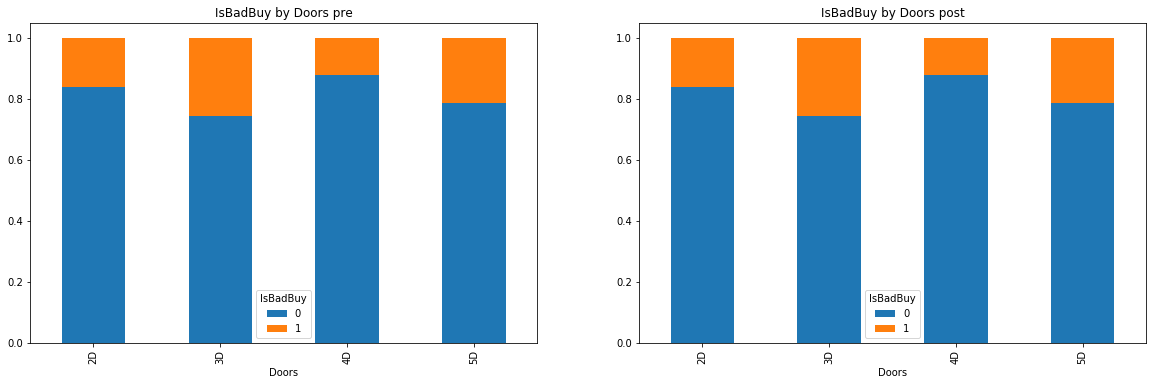

I valori nel pre con meno di 2 elementi sono:
Series([], Name: Doors, dtype: int64)


I valori nel post con meno di 2 elementi sono:
Series([], Name: Doors, dtype: int64)





SubModel


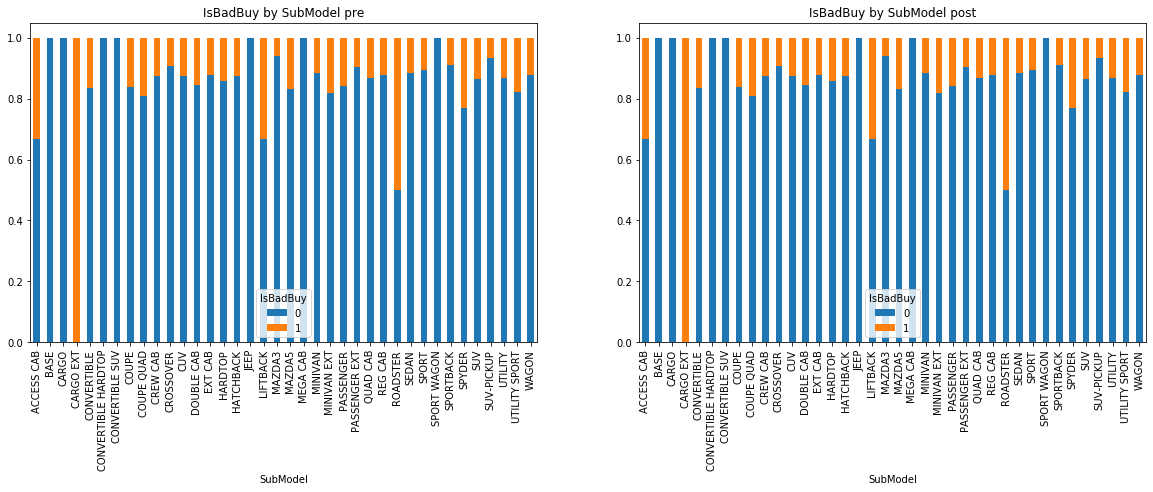

I valori nel pre con meno di 2 elementi sono:
CARGO          1
SPORT WAGON    1
Name: SubModel, dtype: int64


I valori nel post con meno di 2 elementi sono:
CARGO          1
SPORT WAGON    1
Name: SubModel, dtype: int64







In [22]:
for Variable in categories:
    if Variable in pre.columns:
        
        compare= comp and Variable in post.columns
        print(Variable)
        
        title1=RealTitle+Variable

        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        #Creation of the cross tab
        pclass_xt1 = pd.crosstab(pre[Variable], pre[VarGroup])
        pclass_xt1

        #Normalize the cross tab to sum to 1:
        pclass_xt_pct1 = pclass_xt1.div(pclass_xt1.sum(1).astype(float), axis=0)
        pclass_xt_pct1

        # Plot old Distribution
        ax1 = plt.subplot2grid(fig_dims, (0, 0))
        pclass_xt_pct1.plot(kind='bar', stacked=True, 
                       title=title1+additional1, ax=ax1)

        if compare:
            #Creation of the cross tab
            pclass_xt2 = pd.crosstab(post[Variable], post[VarGroup])
            pclass_xt2

            # Normalize the cross tab to sum to 1:
            pclass_xt_pct2 = pclass_xt2.div(pclass_xt2.sum(1).astype(float), axis=0)
            pclass_xt_pct2

            # Plot new Distribution
            ax2 = plt.subplot2grid(fig_dims, (0, 1))
            pclass_xt_pct2.plot(kind='bar', stacked=True, 
                   title=title1+additional2, ax=ax2)

        plt.show()
        
        Count=pre[Variable].value_counts()
        print('I valori nel pre con meno di 2 elementi sono:')
        print(Count.loc[pre[Variable].value_counts()<2])
        print('\n')
        
        if compare:
            Count=post[Variable].value_counts()
            print('I valori nel post con meno di 2 elementi sono:')
            print(Count.loc[post[Variable].value_counts()<2])
        
        print('\n\n\n\n')

# Analisi Comulativa Attributi Numerici

VehOdo


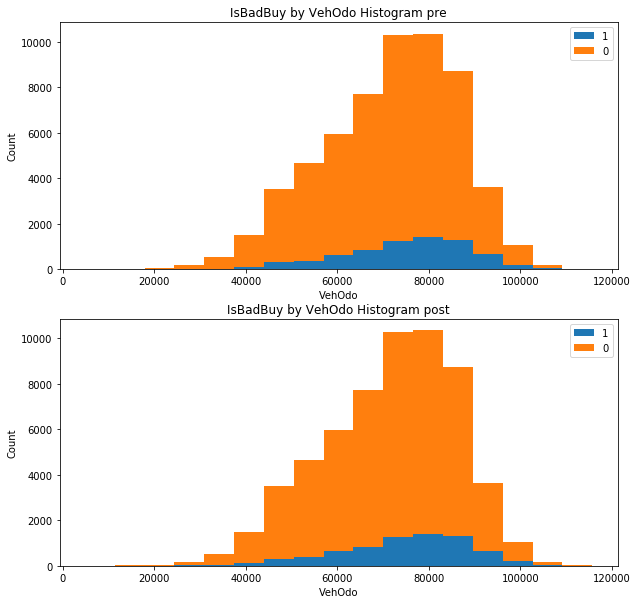

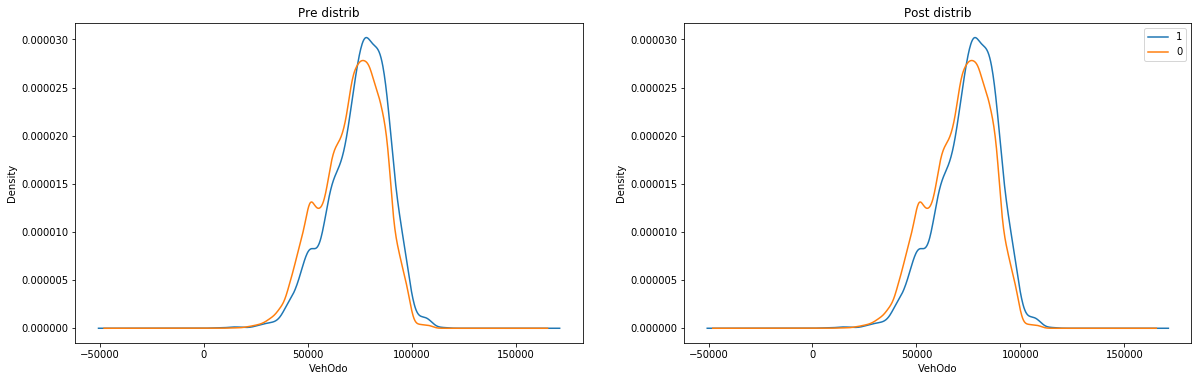

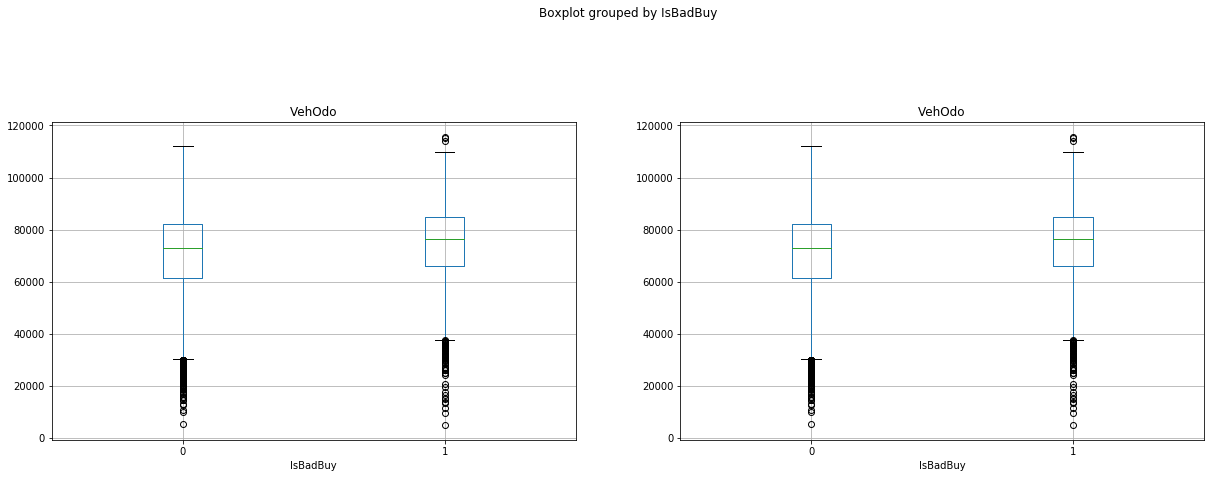






MMRAcquisitionAuctionAveragePrice


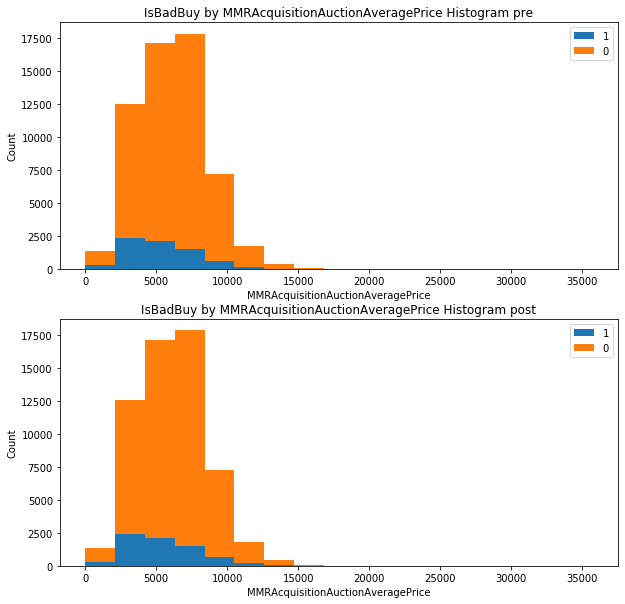

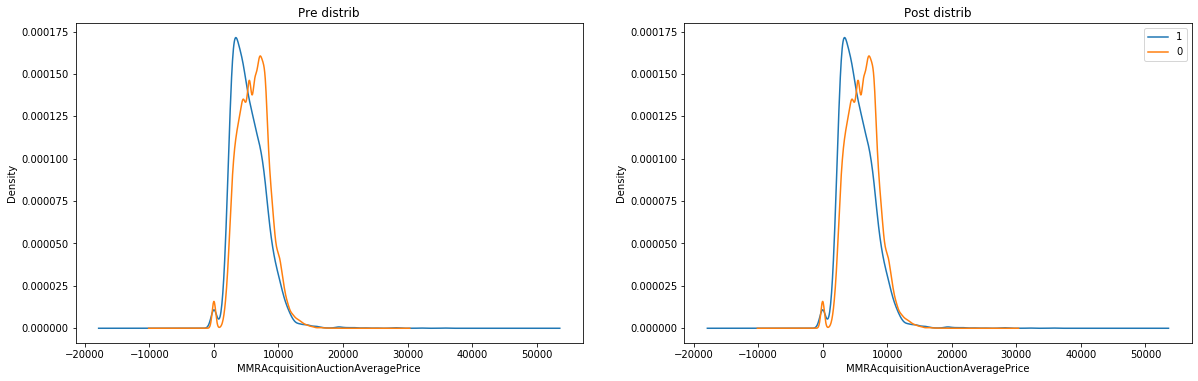

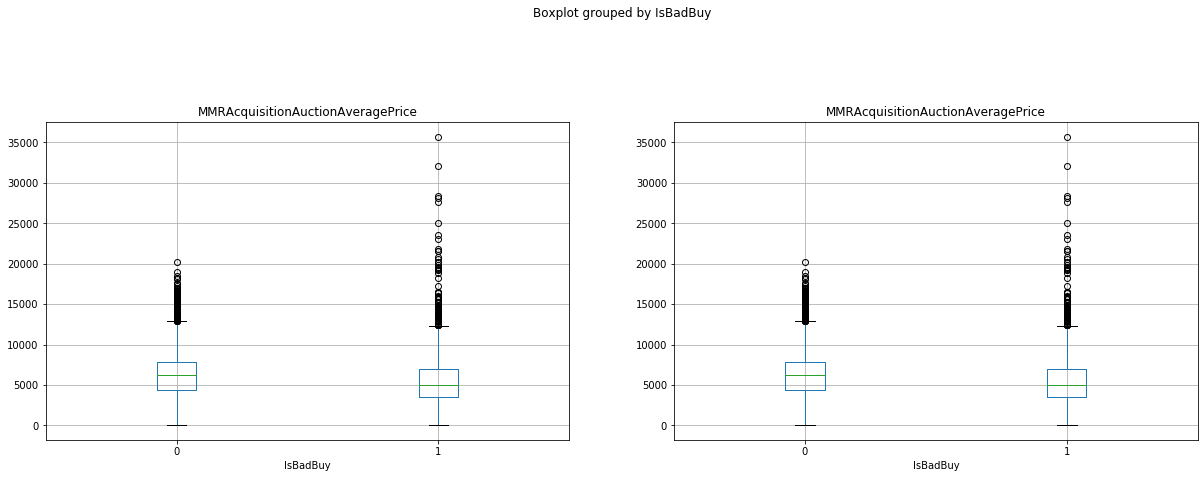






MMRAcquisitionAuctionCleanPrice


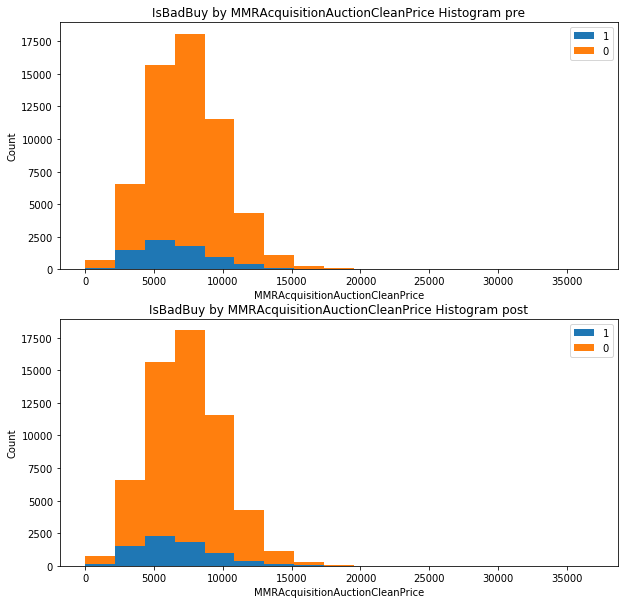

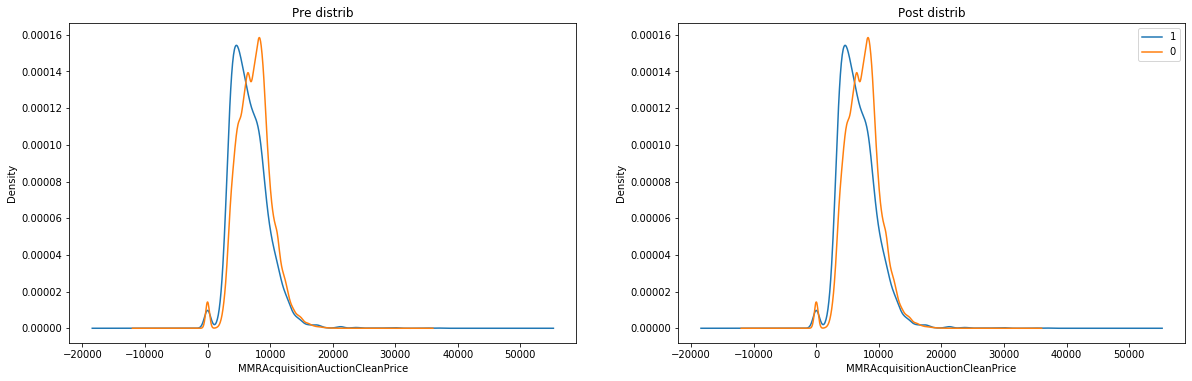

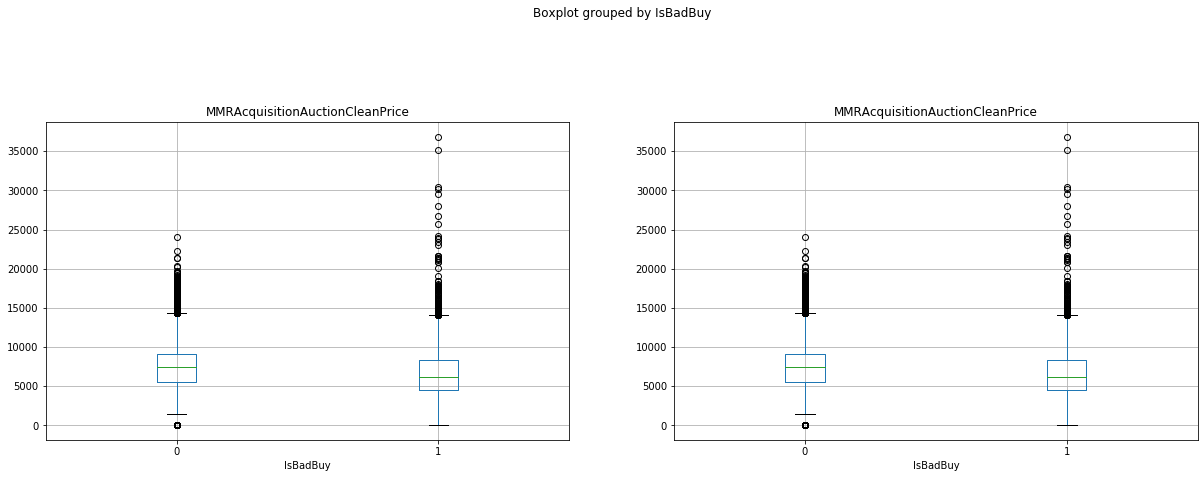






MMRAcquisitionRetailAveragePrice


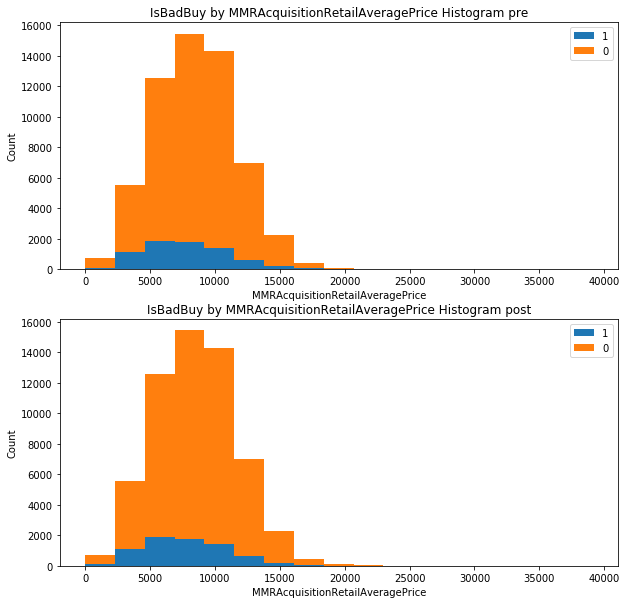

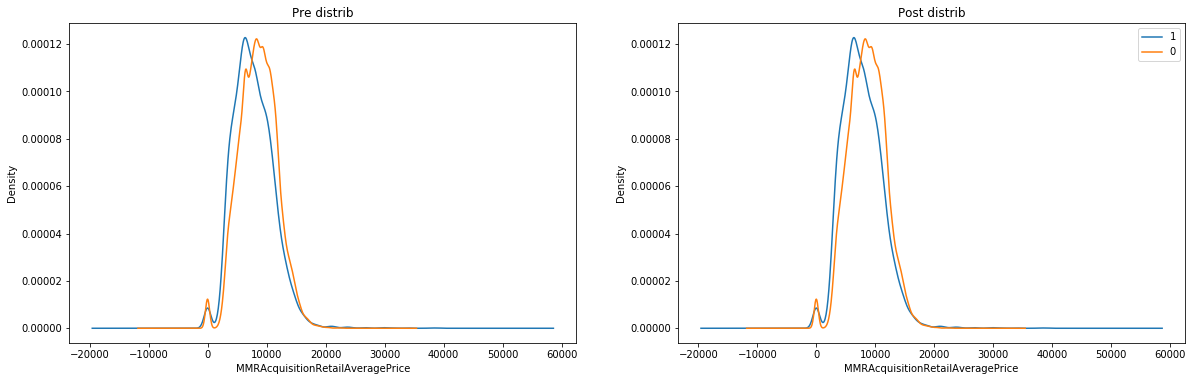

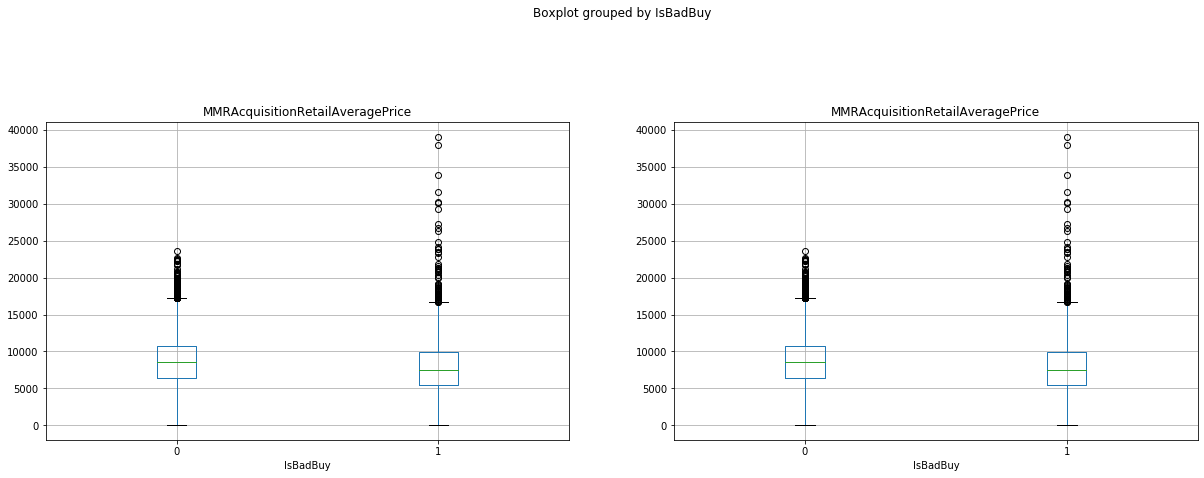






MMRAcquisitonRetailCleanPrice


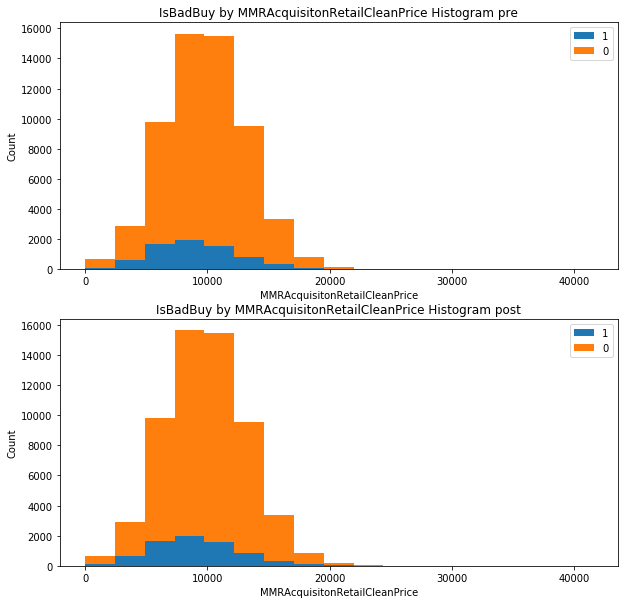

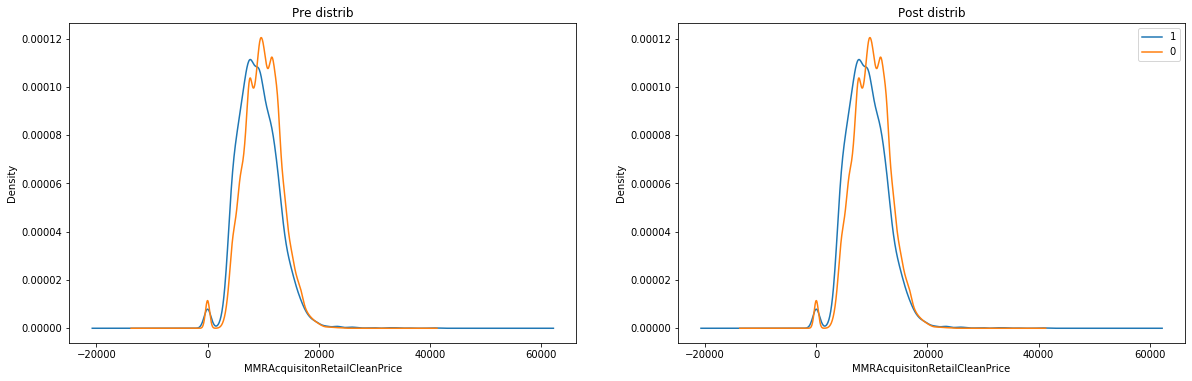

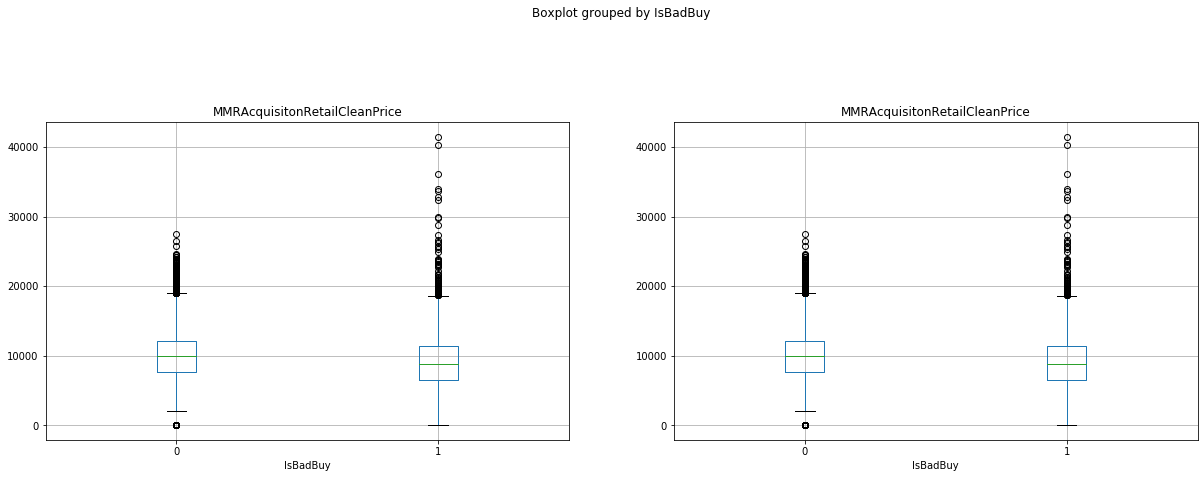






MMRCurrentAuctionAveragePrice


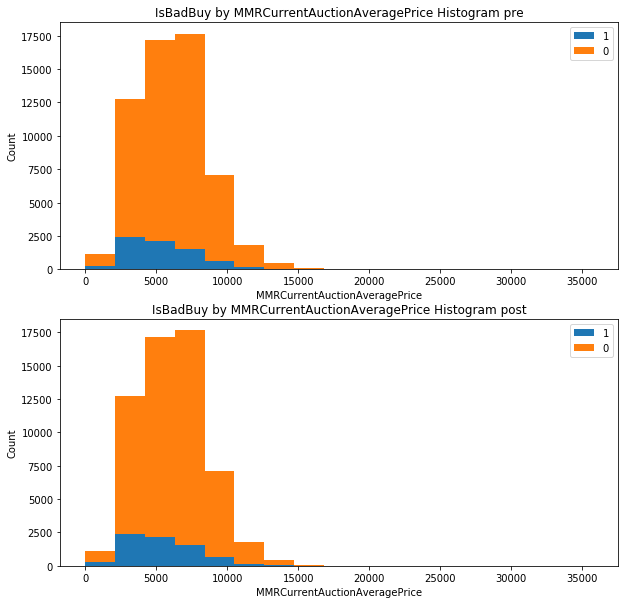

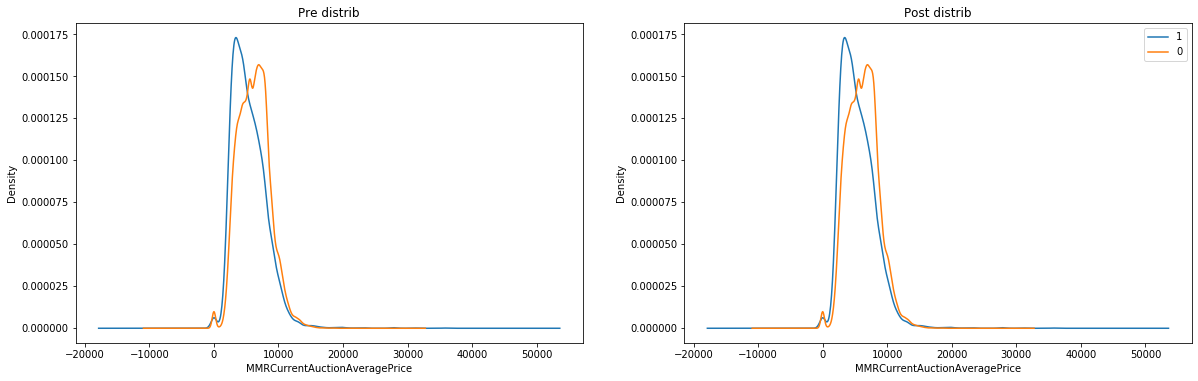

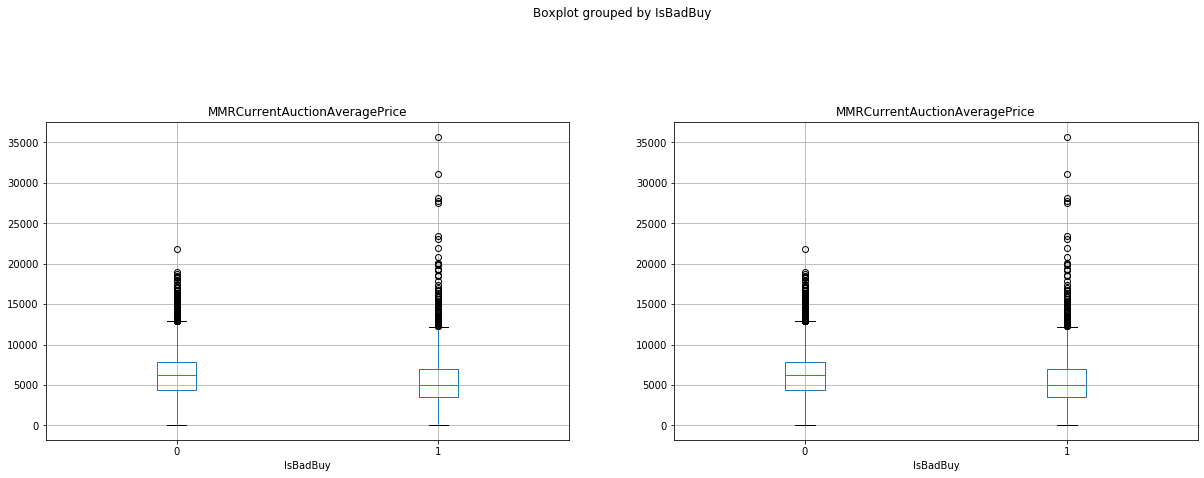






MMRCurrentAuctionCleanPrice


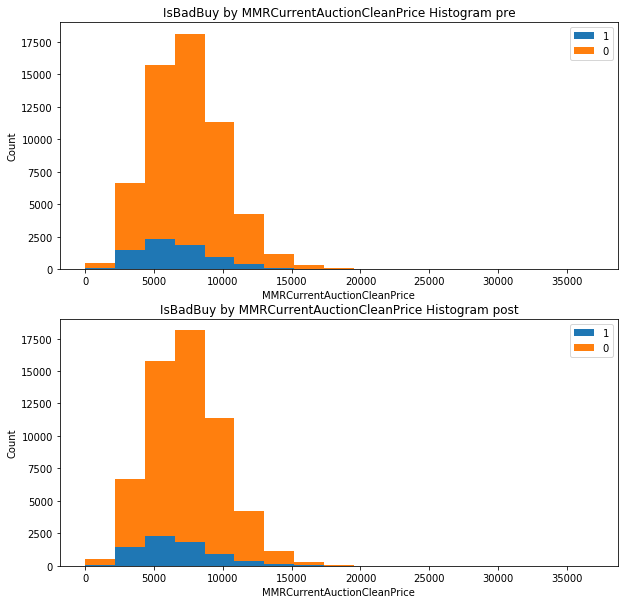

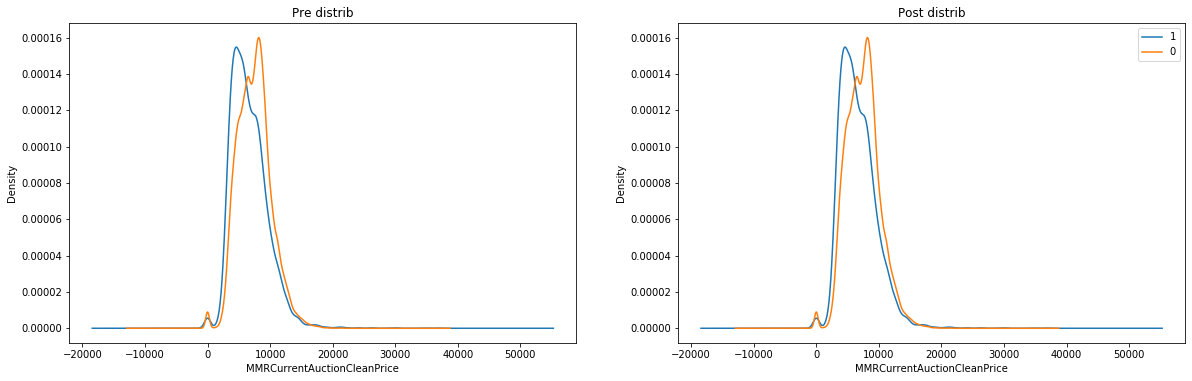

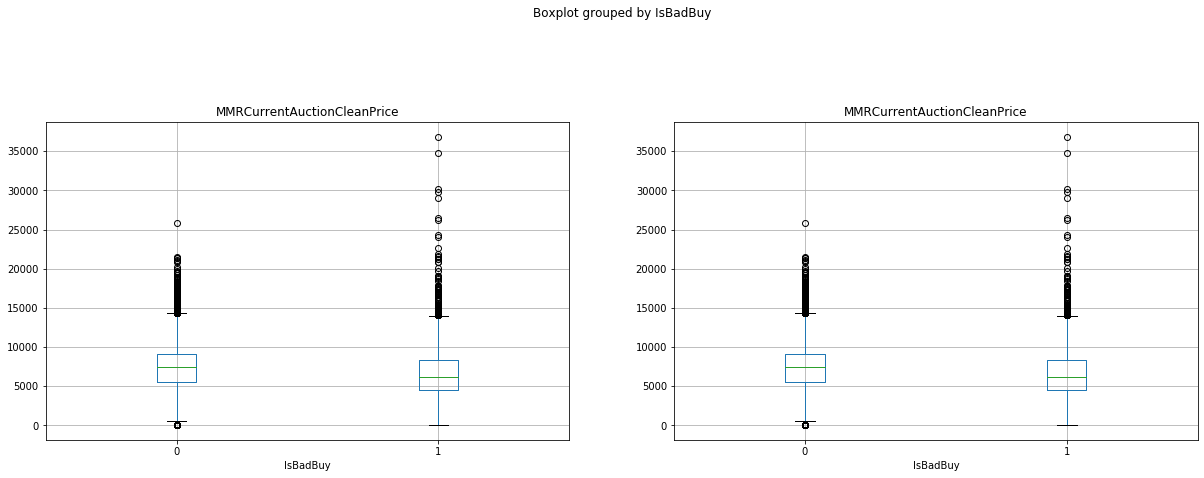






MMRCurrentRetailAveragePrice


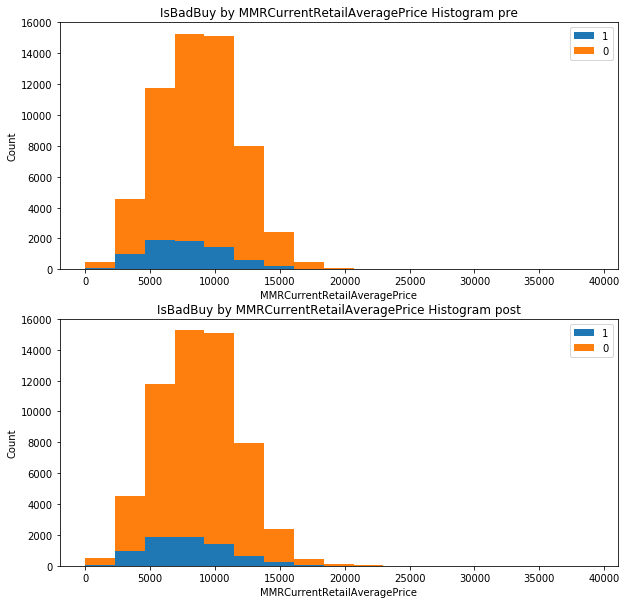

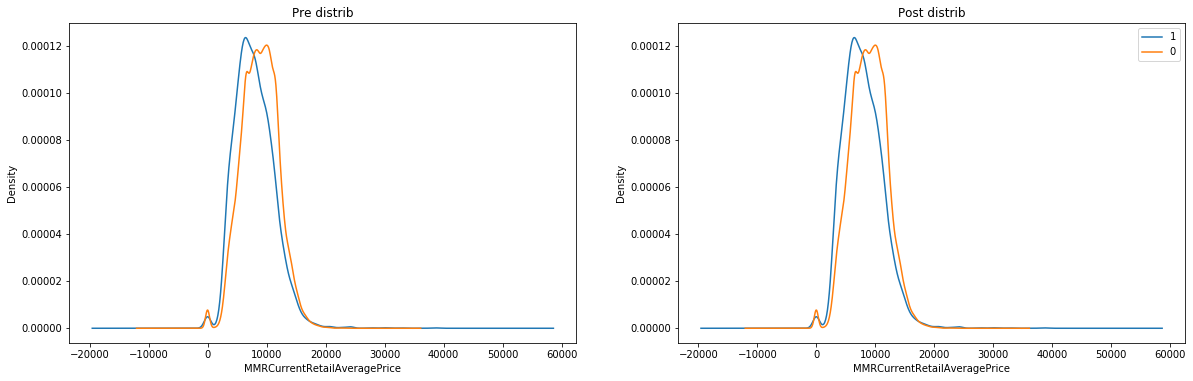

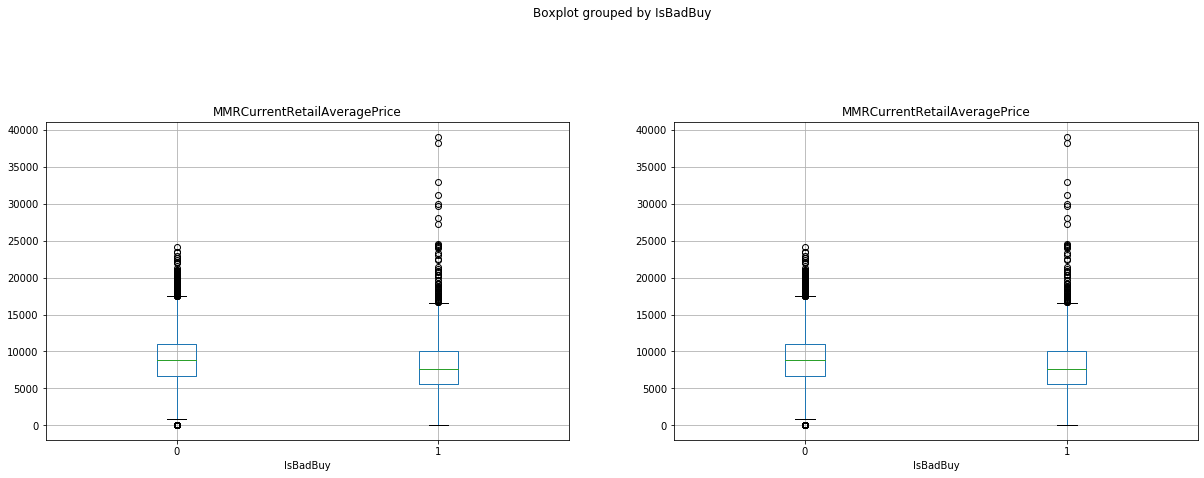






MMRCurrentRetailCleanPrice


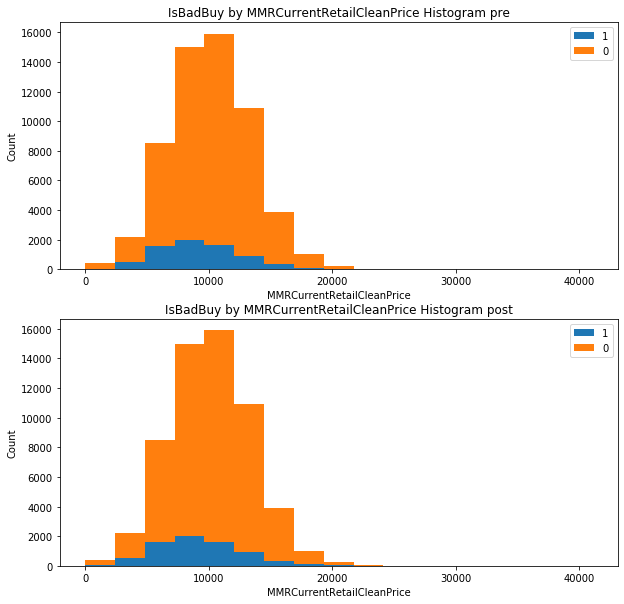

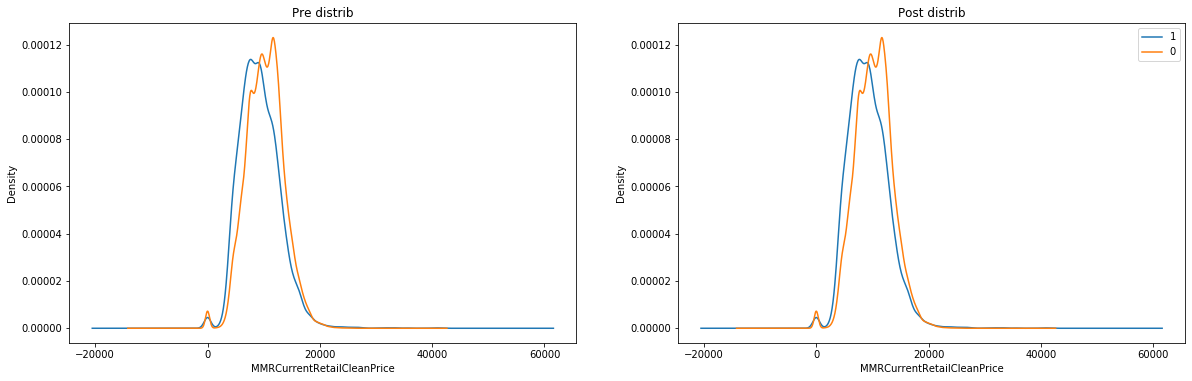

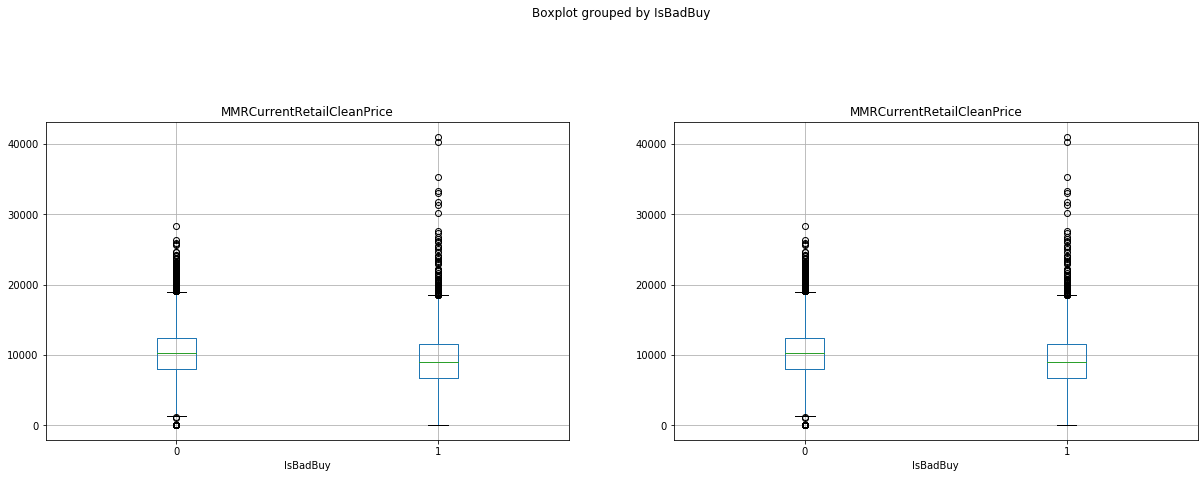






VehBCost


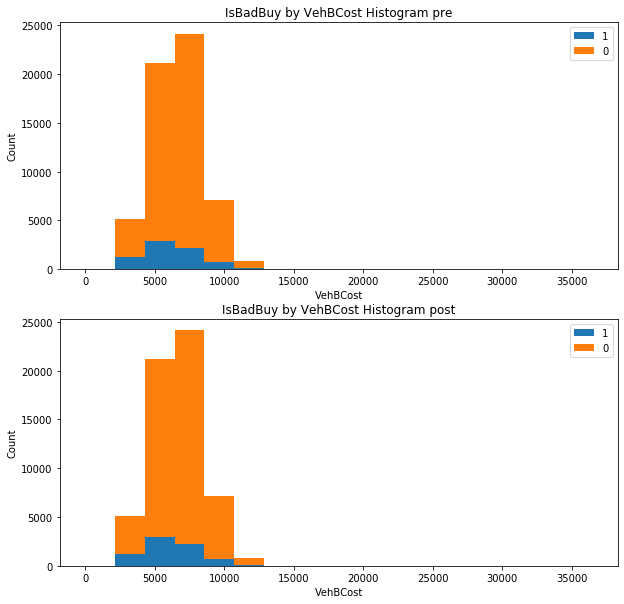

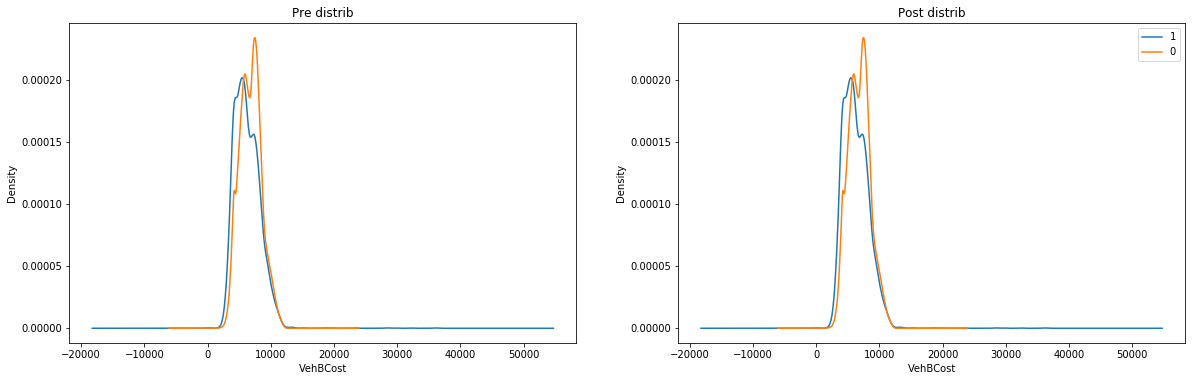

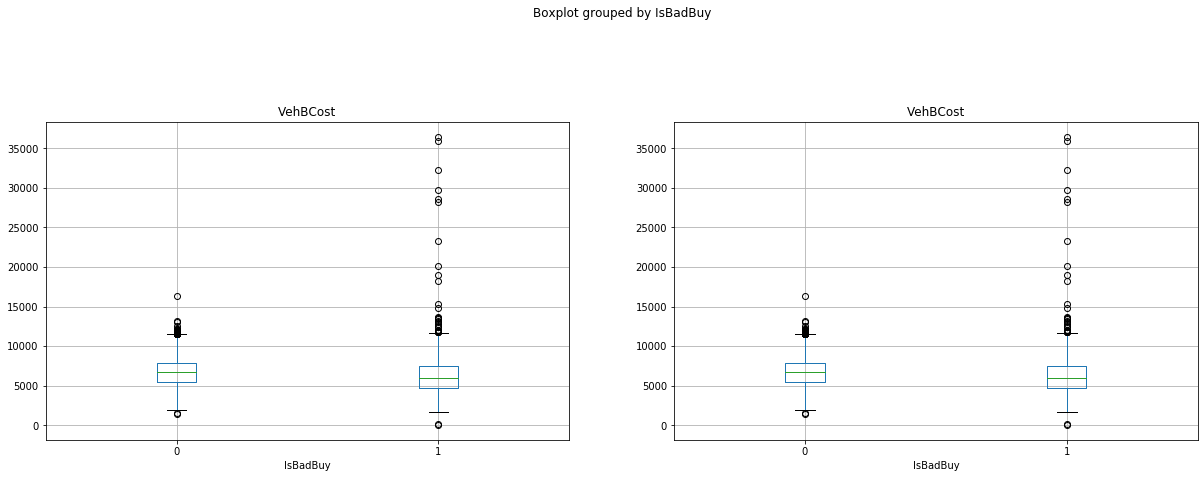






WarrantyCost


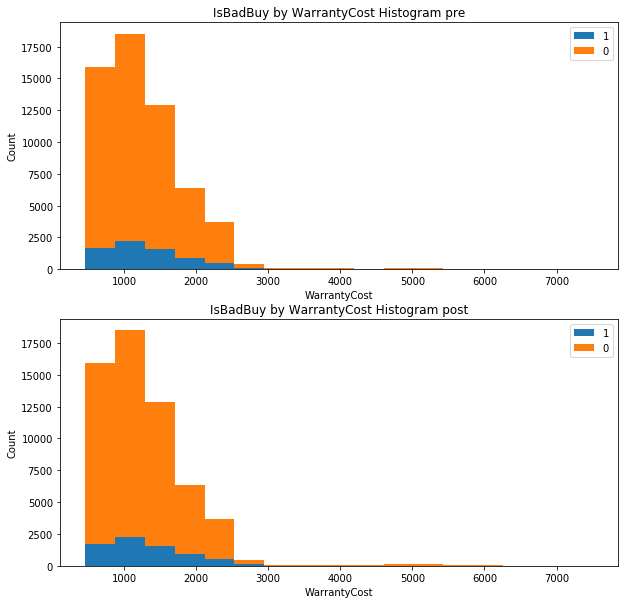

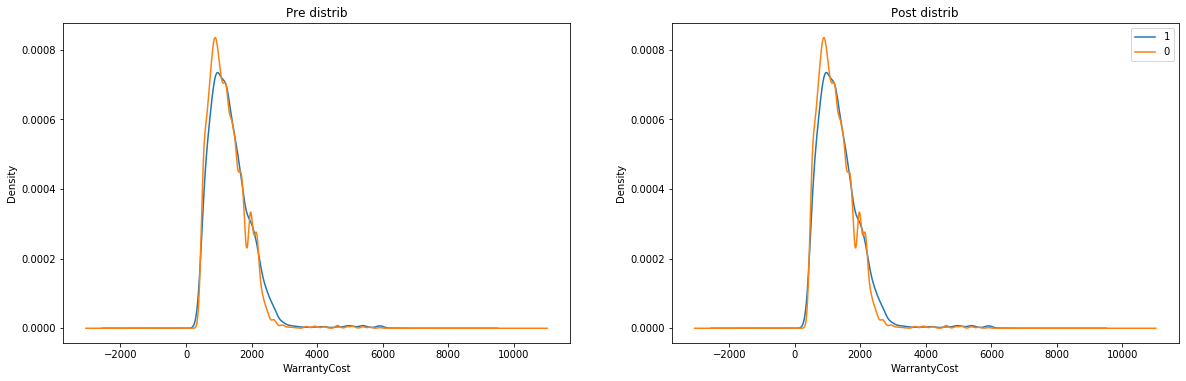

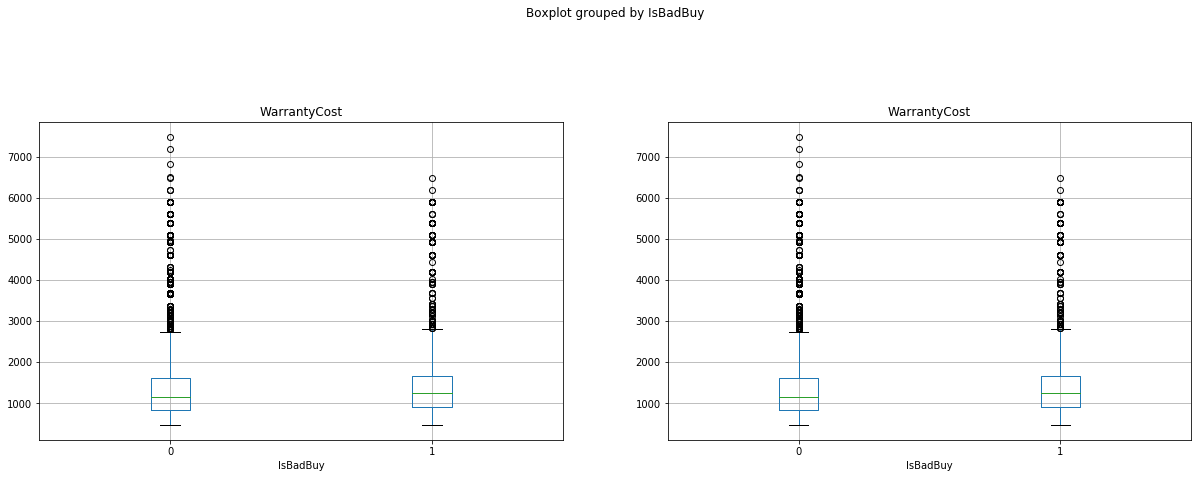

In [23]:
for Variable, limsup, limbot in num_catDis:
    if Variable in pre.columns:
        
        compare= comp and Variable in post.columns
        print(Variable)
        
        #Histograms
        fig, axes = plt.subplots(2, 1, figsize=(10,10))

        title=RealTitle+Variable+str(' Histogram')
        listUnique=list(pre[VarGroup].unique())
        listToPlot=[]

        for value in listUnique:
            if pd.notnull(value):
                tmp = pre[pre[VarGroup] == value][Variable]
                listToPlot.append(tmp)

        max1 = pre[Variable].max()
        min1 = pre[Variable].min()
        bins1 = PreBins
    
        if pre[Variable].nunique() <20:
            bins1=pre[Variable].nunique()
        

        axes[0].hist(listToPlot, 
                     bins=bins1, # bin_size
                     range=(min1, max1), 
                     stacked=True)


        axes[0].legend(tuple(listUnique), loc='best')
        axes[0].set_title(title+additional1)
        axes[0].set_xlabel(Variable)
        axes[0].set_ylabel('Count')

        if compare:
            listUnique=list(post[VarGroup].unique())
            listToPlot=[]

            for value in listUnique:
                if pd.notnull(value):
                    tmp = post[pre[VarGroup] == value][Variable]
                    listToPlot.append(tmp)

            max1 = post[Variable].max()
            min1 = post[Variable].min()
            bins1 = PostBins
    
            if pre[Variable].nunique() <20:
                bins1=pre[Variable].nunique()

            axes[1].hist(listToPlot, 
                         bins=bins1, # bin_size
                         range=(min1, max1), 
                         stacked=True)


            axes[1].legend(tuple(listUnique), loc='best')
            axes[1].set_title(title+additional2)
            axes[1].set_xlabel(Variable)
            axes[1].set_ylabel('Count')
        
        plt.show()
        
        
        #DensityPlot
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)
        
        # Plot old Distribution
        plt.subplot2grid(fig_dims, (0, 0), title='Pre distrib', xlabel=Variable)
        for Group_Class in pre[VarGroup].unique():
                if pd.notnull(Group_Class):
                    pre[Variable][pre[VarGroup] == Group_Class].plot(kind='kde')

        # Plot new Distribution
        if compare:
            plt.subplot2grid(fig_dims, (0, 1), title='Post distrib', xlabel=Variable)
            for Group_Class in post[VarGroup].unique():
                if pd.notnull(Group_Class):
                    post[Variable][post[VarGroup] == Group_Class].plot(kind='kde')
        
        plt.legend(tuple(pre[VarGroup].unique()), loc='best')
        plt.show()
        
        #Boxplot
        # Set up a grid of plots
        fig = plt.figure(figsize=(20, 20)) 
        fig_dims = (3, 2)

        # Plot old Distribution
        ax1=plt.subplot2grid(fig_dims, (0, 0), title='Pre distrib')
        pre.boxplot(column=[Variable], by=VarGroup, ax=ax1)

        # Plot new Distribution
        if compare:
            ax2=plt.subplot2grid(fig_dims, (0, 1), title='Post distrib')
            post.boxplot(column=[Variable], by=VarGroup, ax=ax2)

        plt.show()
        
        print('\n\n\n\n')